# Lab 2 : Linear Classification, Logistic Regression, SVM, Decision Tree, Boosting

---


Total Points: **100**

Tentative Weightage : **9%**

Submission Deadline :  **$23^{th}$ March 2024 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**




---



**TASK 1**: Classification                                     **(40 Marks)**

We'll begin by considering dataset_1.csv for this particular task. This dataset is referenced in literature for classification methods and is widely employed in the fields of statistics and machine learning. It comprises three classes, each containing 50 instances. These classes represent different models of cars. Notably, one class exhibits linear separability from the other two, whereas the remaining two classes are not linearly separable from each other. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the three classes. (4 Marks)
    1. speed vs price
    2. speed vs hp

2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features. Mark the misclassified samples with different color. Provide a detailed elucidation of your findings and observations in the report. (4+3+4 Marks)

<!-- 3. Implement correlation matrix for the given dataset. Your implementation should handle numerical data and provide correlation coefficients between all pairs of variables. Report your observation. Additionally, discuss the significance of correlation matrices in statistical analysis and data interpretation. (3+2 Marks)   -->

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets.
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

    1. Implement a Elastic Net logistic regressor (with $\alpha=0$, described below) using the gradient descent method. Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (7 Marks)

    2. Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

    3. Plot the classifier for the best regressor. Does the performance improve in comparison to least square method? (3+1 Marks)

    4. If you can implement both L1 and L2 regularization in part 1 i.e., algorithm which considers user defined $\alpha$ and not fixed to 0, then you will be awarded 10 Marks over and above the assignment total marks. Report your observation for different $\alpha$ values. (Optional Question)

5. Implement a Vanilla logistic regressor. Did you observed any difference? If so report your observation with the the Elastic Net classifier. (4+4 Marks)

**Elastic Net Logistic Regression** is a variant of logistic regression that combines both L1 (Lasso) and L2 (Ridge) regularization terms in the cost function. The elastic net regularization technique aims to address some limitations of individual L1 and L2 regularization methods. Mathematically, it is defined as a convex combination of the L1 and the L2 regularization terms:
<br>
$\alpha(\lambda∥w∥_1)+(1−\alpha)(\frac{\lambda}{2}∥w∥_2^2),\alpha \in [0,1],\lambda \ge 0$
<br>
By setting α properly, elastic net contains both L1 and L2 regularization as special cases. For example, if a linear regression model is trained with the elastic net parameter $\alpha$ set to 1, it is equivalent to a Lasso model. On the other hand, if $\alpha$ is set to 0, the trained model reduces to a ridge regression model.

**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Sample of decision boundary.

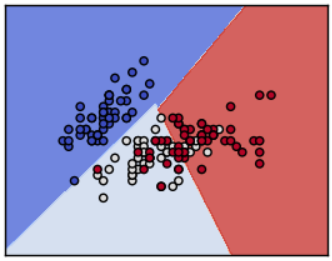

Write your code by creating cells below.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------
# --------1. Plot the dataset using different colors for the three classes. A. speed vs price B.speed vs hp ----------
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [3]:
def read_csv_to_dataframe(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

In [4]:
def plot_data(df, x_column, y_column, color_column):
    dataframe = df.copy(deep=False)
    dataframe['Model'] = dataframe['Model'].replace('Series N', 'red').replace('Series M', 'blue').replace('Series L', 'green')
    plt.scatter(dataframe[x_column], dataframe[y_column], c=dataframe[color_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.show()

In [11]:
file_path = 'dataset_1.csv' 
df = read_csv_to_dataframe(file_path)

   
                  Red: Series N, Blue: Series M, Green: Series L



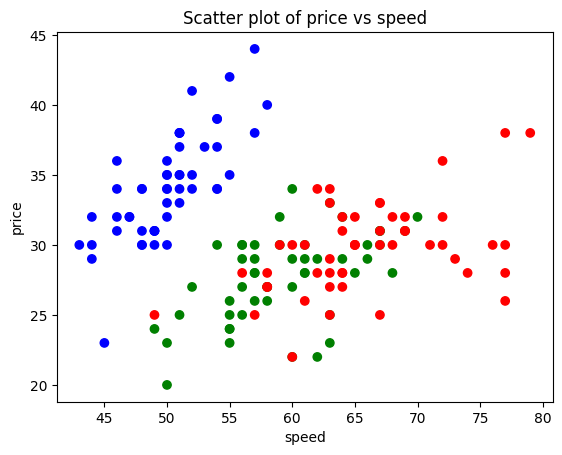

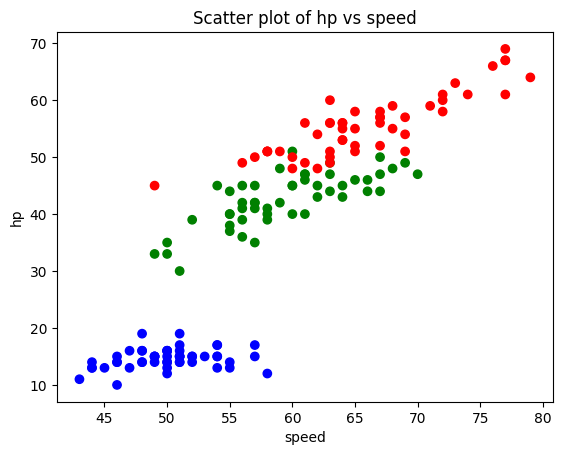

In [12]:
print(
'''   
                  Red: Series N, Blue: Series M, Green: Series L
'''
)
plot_data(df, 'speed', 'price', 'Model')
plot_data(df, 'speed', 'hp', 'Model')

In [13]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ----2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features.------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [14]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------2a. Implemented the linear classifier ---------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [15]:
def linear_regression_weight_vector_and_intercept(X, y_):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))
    weight_vector = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_)
    return weight_vector[1:], weight_vector[0] 

In [16]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2b. Plotting the hyperplanes obtained by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [17]:
def plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xlim(40, 80)  
    plt.ylim(15, 50)  
    plt.title(f"Hyperplanes obtained by linear classifier")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [18]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = linear_regression_weight_vector_and_intercept(X, y_m)
weight_vector_n, intercept_n = linear_regression_weight_vector_and_intercept(X, y_n)
weight_vector_l, intercept_l = linear_regression_weight_vector_and_intercept(X, y_l)

In [19]:
dataframe = df
x_column = 'speed'
y_column = 'price'
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]

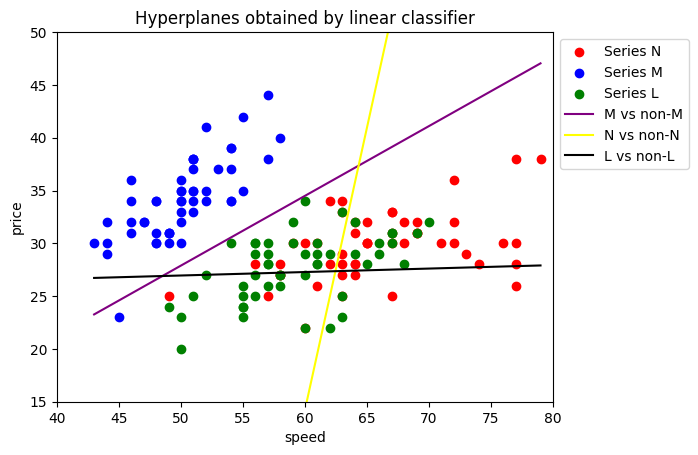

In [20]:
plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [21]:
def condition_function_linear_regression(x, y):
    value_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    value_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) 
    value_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [22]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2c. Plotting the decision boundary of by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [23]:
def plot_linear_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on linear regression desicion boundary')
    plt.show()

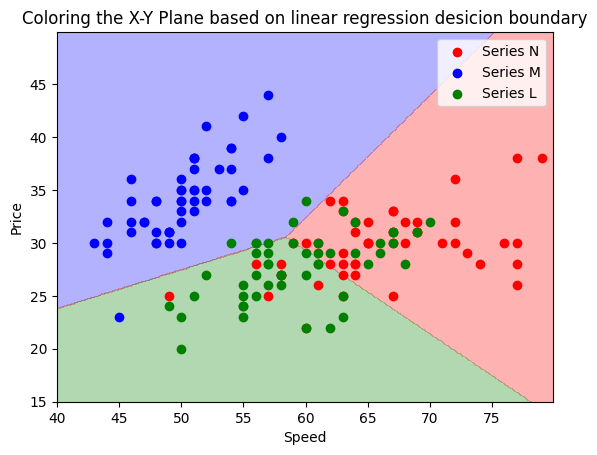

In [24]:
plot_linear_regression_decision_boundary()

In [25]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------2d. Plotting the misclassified points by linear classifier ----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [26]:
def get_linear_classifier_missclassified_points(df, x_column, y_column):
    x_column_missclassified = []
    y_column_missclassified = []
    for index, row in df.iterrows():
        if condition_function_linear_regression(row[x_column], row[y_column]) == 0 and row['Model'] != 'Series M':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        elif condition_function_linear_regression(row[x_column], row[y_column]) == 1 and row['Model'] != 'Series N':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        elif condition_function_linear_regression(row[x_column], row[y_column]) == 2 and row['Model'] != 'Series L':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
    return x_column_missclassified, y_column_missclassified

In [27]:
def plot_linear_regression_decision_boundary_with_missclassification():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    x_column_missclassified, y_column_missclassified = get_linear_classifier_missclassified_points(df, x_column, y_column)
    plt.scatter(x_column_missclassified, y_column_missclassified, c='black', label='Missclassiied')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based linear regression desicion boundary')
    plt.show()

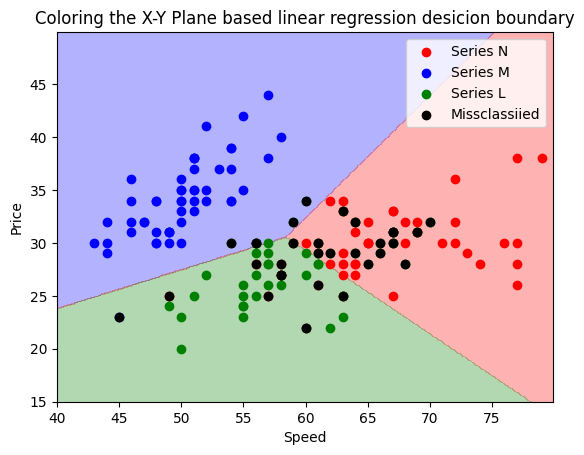

In [28]:
plot_linear_regression_decision_boundary_with_missclassification()

In [29]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------3. Implement a Regularised logistic regressor. ------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [30]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3a. Implemented the ridge logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [31]:
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [32]:
def l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [33]:
def spilt_data_into_training_and_testing(df, random_state):
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    total_rows = len(df_shuffled)
    train_rows = int(0.8 * total_rows)
    train_df = df_shuffled[:train_rows]
    test_df = df_shuffled[train_rows:]
    return train_df, test_df

In [34]:
def plot_l2_regularised_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [35]:
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [36]:
def l2_regularised_condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [37]:
def plot_l2_regularised_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(l2_regularised_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on L2 regularised decision boundary')
    plt.show()

In [38]:
num_iterations = 100000
leaning_rate = 0.01
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
lamdas = [0.01, 0.1, 1, 10, 100]

for lamda in lamdas:
    training_accuracy = []
    testing_accuracy = []
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, leaning_rate, lamda)
        weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, leaning_rate, lamda)
        weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, leaning_rate, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
            
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy.append(training_error/len(X_train))
        testing_accuracy.append(testing_error/len(X_test))
        
    print("Lamda :", lamda)
    print("Training Accuracy mean: ", round(np.mean(np.array(training_accuracy)), 3))
    print("Training Accuracy std: ", round(np.std(np.array(training_accuracy)), 3))
    print("Testing Accuracy mean: ", round(np.mean(np.array(testing_accuracy)), 3))
    print("Testing Accuracy std: ", round(np.std(np.array(testing_accuracy)), 3))
    print(" ")

Lamda : 0.01
Training Accuracy mean:  0.677
Training Accuracy std:  0.055
Testing Accuracy mean:  0.643
Testing Accuracy std:  0.129
 
Lamda : 0.1
Training Accuracy mean:  0.651
Training Accuracy std:  0.039
Testing Accuracy mean:  0.617
Testing Accuracy std:  0.073
 
Lamda : 1
Training Accuracy mean:  0.522
Training Accuracy std:  0.105
Testing Accuracy mean:  0.493
Testing Accuracy std:  0.174
 
Lamda : 10
Training Accuracy mean:  0.432
Training Accuracy std:  0.102
Testing Accuracy mean:  0.38
Testing Accuracy std:  0.133
 
Lamda : 100
Training Accuracy mean:  0.529
Training Accuracy std:  0.128
Testing Accuracy mean:  0.427
Testing Accuracy std:  0.174
 


In [39]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3b. Repeat experiment with different beta values -----------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [40]:
lamda = 0.01
num_iterations = 100000
beta_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []

for beta in beta_values:
    beta = round(beta, 4)
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
        weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
        weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(round(np.mean(np.array(training_accuracy_i)), 5))
    testing_accuracy.append(round(np.mean(np.array(testing_accuracy_i)), 5))

beta_values = ['1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10'] 
print("For lamda : 0.01")
print("For iterations : 0.01")
print("Beta values: ", beta_values)
print("Training accuracy: ", training_accuracy)
print("Testing accuarcy: ", testing_accuracy)

For lamda : 0.01
For iterations : 0.01
Beta values:  ['1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10']
Training accuracy:  [0.655, 0.66583, 0.67917, 0.62833, 0.67667, 0.65167, 0.61833, 0.61083, 0.56417, 0.3875, 0.4825]
Testing accuarcy:  [0.59, 0.59333, 0.64333, 0.6, 0.64333, 0.61333, 0.58667, 0.56333, 0.52667, 0.34333, 0.43333]


In [41]:
def plot_training_and_testing_accuracy(beta_values, training_accuracy, testing_accuracy):
    plt.plot(beta_values, training_accuracy, color = 'green', label = 'Training accuracy')
    plt.plot(beta_values, testing_accuracy, color = 'yellow', label = 'Testing accuracy')
    plt.xlabel('beta')
    plt.ylabel('accuracy')
    plt.title('Plot of beta vs accuracy')
    plt.legend() 
    plt.xticks(rotation=60)
    plt.ylim(0.3, 0.70)  
    plt.show()

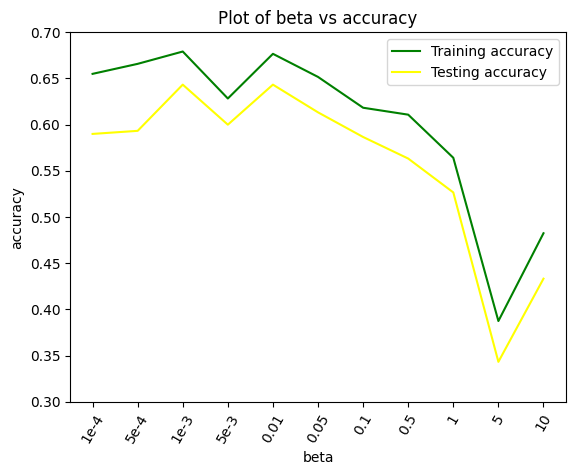

In [42]:
plot_training_and_testing_accuracy(beta_values, training_accuracy, testing_accuracy)

In [43]:
# ------------------------------------------------------------------------------------------------------------------------
# ---------------------------------------- 3c.1. Plotting the optimal regressor -----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [44]:
beta = 0.001
lamda = 0.01
num_iterations = 100000
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, beta, lamda)
weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, beta, lamda)
weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, beta, lamda)

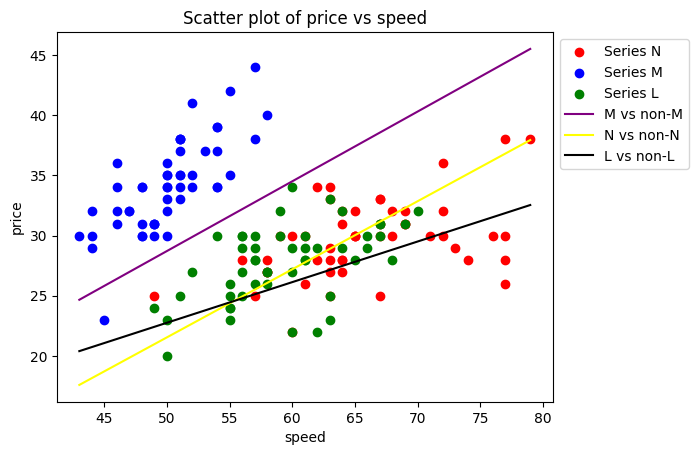

In [45]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_l2_regularised_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

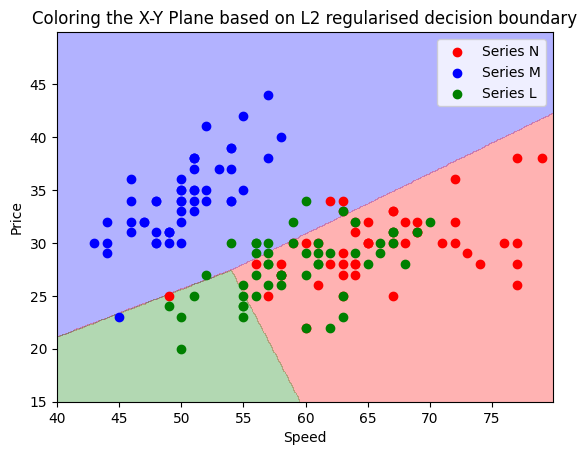

In [46]:
plot_l2_regularised_logistic_regression_decision_boundary()

In [47]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------- 3c.2. Comparing logistic regression with least square having linear regression -----------------
# ------------------------------------------------------------------------------------------------------------------------

In [48]:
lamda = 0.01
beta = 0.001
num_iterations = 100000
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy_logistic = 0
testing_accuracy_logistic = 0
training_accuracy_linear = 0
testing_accuracy_linear = 0

training_accuracy_i_logistic = []
testing_accuracy_i_logistic = []
training_accuracy_i_linear = []
testing_accuracy_i_linear = []

for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
    weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
    weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
    training_error_logistic = len(X_train)
    for i in range(len(X_train)):
        if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_logistic -= 1
            
    testing_error_logistic = len(X_test)
    for i in range(len(X_test)):
        if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_logistic -= 1

    training_accuracy_i_logistic.append(training_error_logistic/len(X_train))
    testing_accuracy_i_logistic.append(testing_error_logistic/len(X_test))

    weight_vector_m, intercept_m = linear_regression_weight_vector_and_intercept(X, y_m)
    weight_vector_n, intercept_n = linear_regression_weight_vector_and_intercept(X, y_n)
    weight_vector_l, intercept_l = linear_regression_weight_vector_and_intercept(X, y_l)

    training_error_linear = len(X_train)
    for i in range(len(X_train)):
        if condition_function_linear_regression(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_linear -= 1
            
    testing_error_linear = len(X_test)
    for i in range(len(X_test)):
        if condition_function_linear_regression(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_linear -= 1

    training_accuracy_i_linear.append(training_error_linear/len(X_train))
    testing_accuracy_i_linear.append(testing_error_linear/len(X_test))

In [49]:
training_accuracy_logistic = round(np.mean(np.array(training_accuracy_i_logistic)), 5)
testing_accuracy_logistic = round(np.mean(np.array(testing_accuracy_i_logistic)), 5)
training_accuracy_linear = round(np.mean(np.array(training_accuracy_i_linear)), 5)
testing_accuracy_linear = round(np.mean(np.array(testing_accuracy_i_linear)), 5)

print("Training accuracy of l2 regularised logistic regression: ", training_accuracy_logistic)
print("Training accuracy of linear regression: ", training_accuracy_linear)
print("Testing accuarcy of l2 regularised logistic regression: ", testing_accuracy_logistic)
print("Testing accuracy of linear regression: ", testing_accuracy_linear)

Training accuracy of l2 regularised logistic regression:  0.67917
Training accuracy of linear regression:  0.79333
Testing accuarcy of l2 regularised logistic regression:  0.64333
Testing accuracy of linear regression:  0.79333


In [50]:
# ------------------------------------------------------------------------------------------------------------------------
# ----------------------------------- 3d. L1 and L2 regularised logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [51]:
def l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda, alpha):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + alpha * lamda * np.sign(weight_vector) + (1 - alpha) * lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [52]:
def plot_l1_and_l2_regularised_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(l2_regularised_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on L1 and L2 regularised decision boundary')
    plt.show()

In [53]:
lamda = 0.1
beta = 0.01
num_iterations = 10000
alpha_values = np.arange(0, 1.1, 0.1)
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy = []
testing_accuracy = []

for alpha in alpha_values:
    alpha = round(alpha, 3)
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda, alpha)
        weight_vector_n, intercept_n = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda, alpha)
        weight_vector_l, intercept_l = l1_and_l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda, alpha)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(round(np.mean(np.array(training_accuracy_i)), 3))
    testing_accuracy.append(round(np.mean(np.array(testing_accuracy_i)), 3))

print("Training accuracy: ", training_accuracy)
print("Testing accuarcy: ", testing_accuracy)

Training accuracy:  [0.599, 0.646, 0.626, 0.604, 0.602, 0.602, 0.58, 0.595, 0.637, 0.617, 0.628]
Testing accuarcy:  [0.583, 0.61, 0.633, 0.597, 0.543, 0.537, 0.56, 0.553, 0.61, 0.613, 0.617]


In [54]:
def plot_training_and_testing_acuracy_with_alpha():
    plt.plot(alpha_values, training_accuracy, color = 'green', label = 'Training accuracy')
    plt.plot(alpha_values, testing_accuracy, color = 'yellow', label = 'Testing accuracy')
    plt.xlabel('alpha')
    plt.ylabel('accuracy')
    plt.title('Plot of alpha vs accuracy')
    plt.legend()
    plt.show()

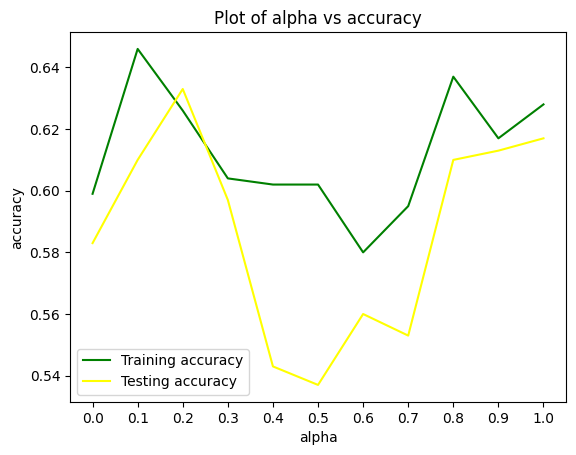

In [55]:
alpha_values = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plot_training_and_testing_acuracy_with_alpha()

In [56]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------4. Implement a Vanilla logistic regressor. ----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [57]:
# ------------------------------------------------------------------------------------------------------------------------
# ------------------------------------ Implementing the vanilla logistic regression --------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [58]:
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [59]:
def logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_))
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [60]:
# -------------------------------------------------------------------------------------------------------------
# ------------------------ Hyperplanes obtained by vanilla logistic regression --------------------------------
# -------------------------------------------------------------------------------------------------------------

In [61]:
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.title("Hyperplanes obtained by vanilla logistic regression")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [62]:
num_iterations = 100000
learning_rate = 0.001
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, learning_rate)
weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, learning_rate)
weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, learning_rate)

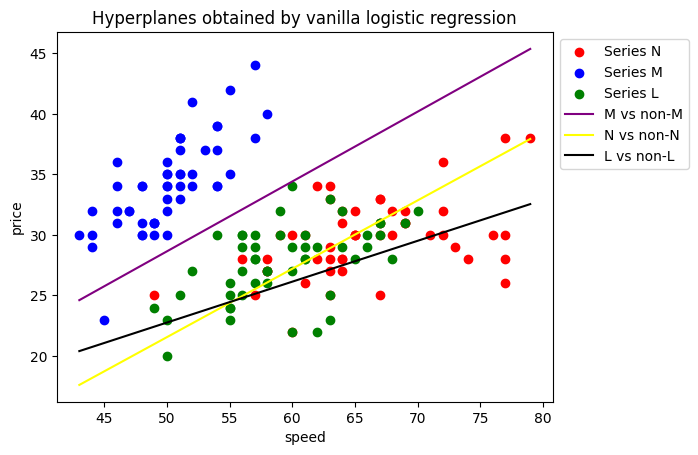

In [63]:
dataframe = df
x_column = 'speed'
y_column = 'price'
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [64]:
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [65]:
def vanilla_logistic_regression_condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [66]:
# ---------------------------------------------------------------------------------------------------------------------
# ------------------------------- Desicion boundary of vanilla logistic regression ------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [67]:
def plot_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(vanilla_logistic_regression_condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on vanilla logistic regression decision boundary')
    plt.show()

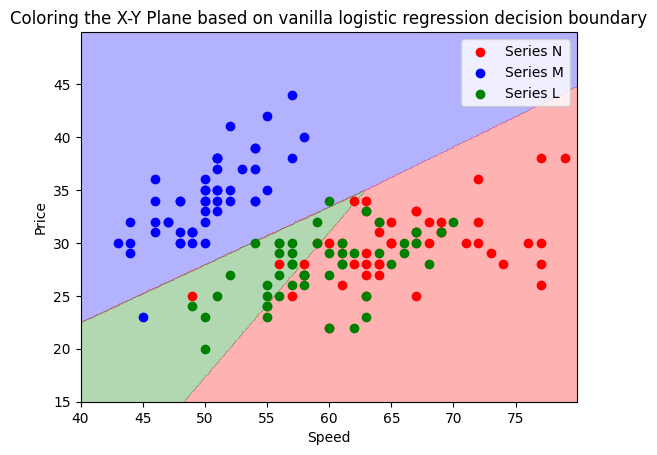

In [68]:
plot_logistic_regression_decision_boundary()

In [69]:
# -----------------------------------------------------------------------------------------------------------------
# ------------------- Comparing vanilla logistic regression with net elastic logistic regression ------------------
# -----------------------------------------------------------------------------------------------------------------

In [70]:
lamda = 0.01
beta = 0.001
num_iterations = 100000
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

training_accuracy_l2_logistic = 0
testing_accuracy_l2_logistic = 0
training_accuracy_vanilla_logistic = 0
testing_accuracy_vanilla_logistic = 0

training_accuracy_i_l2_logistic = []
testing_accuracy_i_l2_logistic = []
training_accuracy_i_vanilla_logistic = []
testing_accuracy_i_vanilla_logistic = []

for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, num_iterations, beta, lamda)
    weight_vector_n, intercept_n = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, num_iterations, beta, lamda)
    weight_vector_l, intercept_l = l2_regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, num_iterations, beta, lamda)
    
    training_error_l2_logistic = len(X_train)
    for i in range(len(X_train)):
        if l2_regularised_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_l2_logistic -= 1
            
    testing_error_l2_logistic = len(X_test)
    for i in range(len(X_test)):
        if l2_regularised_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_l2_logistic -= 1

    training_accuracy_i_l2_logistic.append(training_error_l2_logistic/len(X_train))
    testing_accuracy_i_l2_logistic.append(testing_error_l2_logistic/len(X_test))

    weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, num_iterations, learning_rate)
    weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, num_iterations, learning_rate)
    weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, num_iterations, learning_rate)

    training_error_vanilla_logistic = len(X_train)
    for i in range(len(X_train)):
        if vanilla_logistic_regression_condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error_vanilla_logistic -= 1
            
    testing_error_vanilla_logistic = len(X_test)
    for i in range(len(X_test)):
        if vanilla_logistic_regression_condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error_vanilla_logistic -= 1

    training_accuracy_i_vanilla_logistic.append(training_error_vanilla_logistic/len(X_train))
    testing_accuracy_i_vanilla_logistic.append(testing_error_vanilla_logistic/len(X_test))

In [73]:
training_accuracy_l2_logistic = round(np.mean(np.array(training_accuracy_i_l2_logistic)), 5)
testing_accuracy_l2_logistic = round(np.mean(np.array(testing_accuracy_i_l2_logistic)), 5)
training_accuracy_vanilla_logistic = round(np.mean(np.array(training_accuracy_i_vanilla_logistic)), 5)
testing_accuracy_vanilla_logistic = round(np.mean(np.array(testing_accuracy_i_vanilla_logistic)), 5)

print("Training accuracy of l2 regularised logistic regression: ", training_accuracy_l2_logistic)
print("Training accuracy of vanilla logistic regression: ", training_accuracy_vanilla_logistic)
print("Testing accuarcy of l2 regularised logistic regression: ", testing_accuracy_l2_logistic)
print("Testing accuracy of vanilla logistic regression: ", testing_accuracy_vanilla_logistic)

Training accuracy of l2 regularised logistic regression:  0.67917
Training accuracy of vanilla logistic regression:  0.75833
Testing accuarcy of l2 regularised logistic regression:  0.64333
Testing accuracy of vanilla logistic regression:  0.73333


**TASK 2**: SVM                         **(33 Marks)**

Let's use the same dataset_1.csv for this task. It can be observed that the data was not perfectly linearly seperable with logistic classfier. One-vs-Rest (OVR) SVM, is an approach used in multiclass classification tasks. In this strategy, a separate binary support vector machine (SVM) classifier is trained for each class in the dataset, treating it as the positive class while considering all other classes as the negative class. **Reference:** Slide 21 of [OVR SVM](https://www.cse.iitk.ac.in/users/piyush/courses/ml_autumn18/material/771_A18_lec11_print.pdf)

1. Implement a OVR SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (5 + 2 + 2 + 2 + 2 + 2 Marks)

2. Try to fit a non linear SVM say polynomial kernel (degree=$3$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (2+2+2+3+2+2 Marks)

3. Evaluate your classifier performance using precision, recall and f1-score. Report your observations. **Note:** You can use [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html) metrics for this part only. (3+2 Marks)

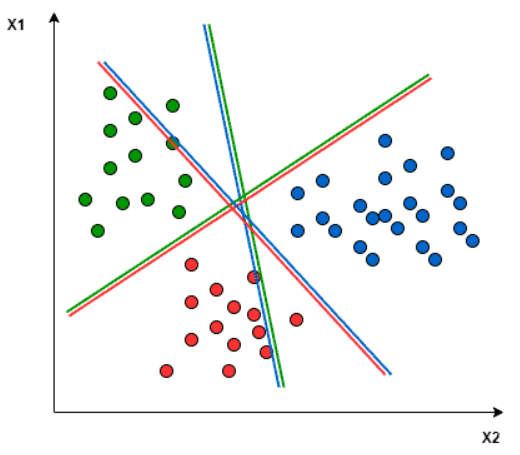

**Note:**

**Confusion Matrix:** A confusion matrix is a performance measurement tool used in classification problems, particularly in machine learning. It provides a detailed breakdown of the model's predictions, allowing the assessment of the model's accuracy and error types.

**Precision:** Precision measures the accuracy of the positive predictions made by the model.

**Recall:** Recall measures the ability of the model to capture all the positive instances in the dataset.

**F1-score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, taking into account both false positives and false negatives. The F1 score is useful when there is an uneven class distribution and a need to consider trade-offs between precision and recall.


Write your code by creating cells below.



In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxopt
import random
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
def read_csv_to_dataframe(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

In [76]:
def plot_data(df, x_column, y_column, color_column):
    dataframe = df.copy(deep=False)
    dataframe['Model'] = dataframe['Model'].replace('Series N', 'red').replace('Series M', 'blue').replace('Series L', 'green')
    plt.scatter(dataframe[x_column], dataframe[y_column], c=dataframe[color_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.show()

In [77]:
file_path = 'dataset_1.csv' 
df = read_csv_to_dataframe(file_path)

   
                  Red: Series N, Blue: Series M, Green: Series L



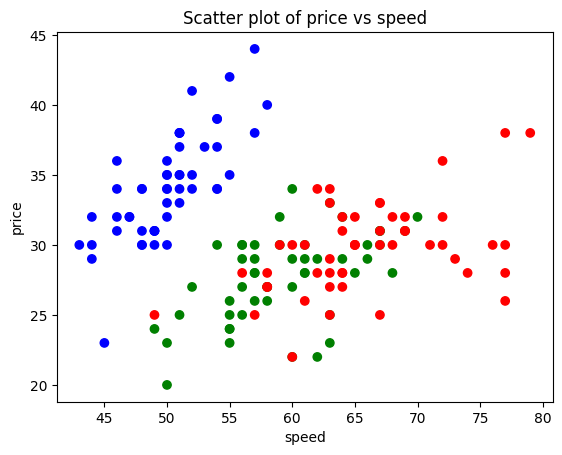

In [78]:
print(
'''   
                  Red: Series N, Blue: Series M, Green: Series L
'''
)
plot_data(df, 'speed', 'price', 'Model')

In [79]:
random.seed(1065)

In [80]:
# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------- Part 1 -----------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

In [81]:
# ----------------------------------------------------------------------------------------------------------------------
# ------------------------------------------1. Implement a OVR SVM classifier. -----------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

In [82]:
def get_svm_weight_vector_and_intercept_having_linear_kernal(X, y, c):
    row, col = X.shape
    K = np.zeros((row, row))
    for i in range(row):
        for j in range(row):
            K[i,j] = np.dot(X[i], X[j])

    # Constructing optimization problem
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(row))
    A = cvxopt.matrix(y, (1, row))
    b = cvxopt.matrix(0.0)

    tmp1 = np.diag(np.ones(row) * -1)
    tmp2 = np.identity(row)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(row)
    tmp2 = np.ones(row) * c
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b, options={'show_progress': False})

    # Langrange dual
    a = np.ravel(solution['x'])

    sv = a > 1e-5
    sv_indices = np.arange(len(a))[sv]
    sv_a = a[sv]
    sv_X = X[sv]
    sv_y = y[sv]

    weight_vector = np.zeros(col)
    for i in range(len(sv_a)):
        weight_vector += sv_a[i] * sv_y[i] * sv_X[i]

    intercept = 0
    for n in range(len(sv_a)):
        intercept += sv_y[n]
        intercept -= np.sum(sv_a * sv_y * K[sv_indices[n], sv])
    intercept /= len(sv_a)

    return weight_vector, intercept, len(sv_X)

In [83]:
def condition_function_having_linear_kernal(x, y):
    value_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    value_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) 
    value_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) 
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [84]:
def accuracy_score(y_true, y_pred):
    correct_count = 0
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_count += 1
    accuracy = correct_count / len(y_true)
    return accuracy

In [85]:
def get_average_accuracy_score(c_list):
    X = np.array(df[['speed', 'price']].values.tolist())
    y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
    y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
    y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

    num_folds = 5
    fold_size = len(df) // num_folds
    np.random.seed(100)
    average_accuracy_scores = []
    
    for c in c_list:
        accuracy_scores = []
        
        for _ in range(5):
            indices = np.random.permutation(len(df))
            
            for i in range(num_folds):
        
                start_idx = i * fold_size
                end_idx = (i+1) * fold_size
                
                test_idx = indices[start_idx:end_idx]
                train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
                X_train = np.array([X[j] for j in train_idx])
                X_test = np.array([X[j] for j in test_idx])
                y_train_m = np.array([y_m[j] for j in train_idx])
                y_train_n = np.array([y_n[j] for j in train_idx])
                y_train_l = np.array([y_l[j] for j in train_idx])
                y_test = np.array([y[j] for j in test_idx])
        
                weight_vector_m, intercept_m, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_m, c)
                weight_vector_n, intercept_n, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_n, c)
                weight_vector_l, intercept_l, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_l, c)
    
                y_pred_i = []
                for idx in range(len(X_test)):
                    y_pred_i.append(condition_function_having_linear_kernal(X_test[idx][0], X_test[idx][1]))
        
                accuracy_scores.append(accuracy_score(y_test, y_pred_i))
                
        average_accuracy_scores.append(sum(accuracy_scores) / len(accuracy_scores))
        
    return average_accuracy_scores

In [86]:
def plot_c_vs_avg_accuracy_score(c_list, average_accuracy_scores):
    plt.plot(c_list, average_accuracy_scores, marker='o', linestyle='-', color='blue')
    plt.xticks(c_list, rotation=60) 
    plt.xlabel('C')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score for Different C values')
    plt.ylim(0.7, 0.9)
    plt.show()

In [87]:
# ----------------------------------------------------------------------------------------------------------------------
# --------------------------------- Finding the optimal penalty (or regularization) parameter --------------------------
# ----------------------------------------------------------------------------------------------------------------------

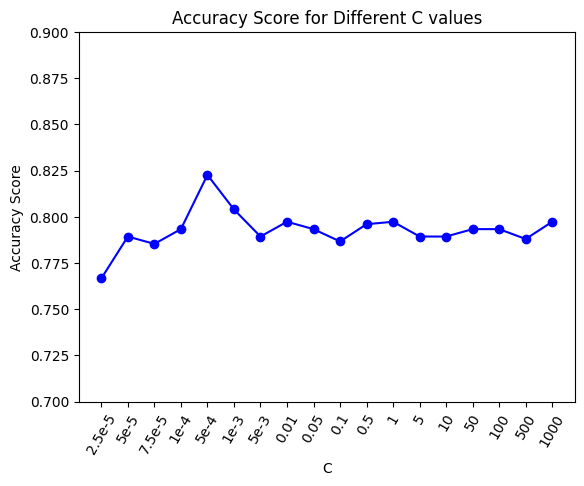

In [88]:
c_list = [0.000025, 0.00005, 0.000075, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

np.random.seed(111)
num_folds = 5
fold_size = len(df) // num_folds
average_accuracy_scores = []

for c in c_list:
    accuracy_scores = []
    
    for _ in range(5):
        indices = np.random.permutation(len(df))
        
        for i in range(num_folds):
    
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            y_test = np.array([y[j] for j in test_idx])
    
            weight_vector_m, intercept_m, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_m, c)
            weight_vector_n, intercept_n, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_n, c)
            weight_vector_l, intercept_l, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_l, c)

            y_pred_i = []
            for idx in range(len(X_test)):
                y_pred_i.append(condition_function_having_linear_kernal(X_test[idx][0], X_test[idx][1]))
    
            accuracy_scores.append(accuracy_score(y_test, y_pred_i))
            
    average_accuracy_scores.append(sum(accuracy_scores) / len(accuracy_scores))
    
c_values = ['2.5e-5', '5e-5', '7.5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10', '50', '100', '500', '1000']
plot_c_vs_avg_accuracy_score(c_values, average_accuracy_scores)

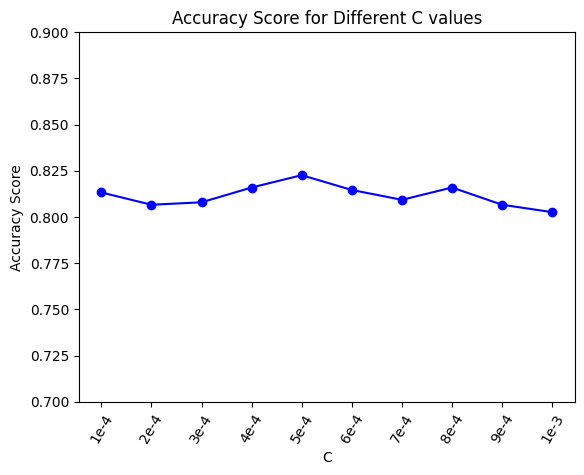

In [89]:
c_list = np.arange(0.0001, 0.0011, 0.0001)

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

np.random.seed(111)
num_folds = 5
fold_size = len(df) // num_folds
average_accuracy_scores = []

for c in c_list:
    accuracy_scores = []
    
    for _ in range(5):
        indices = np.random.permutation(len(df))
        
        for i in range(num_folds):
    
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            y_test = np.array([y[j] for j in test_idx])
    
            weight_vector_m, intercept_m, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_m, c)
            weight_vector_n, intercept_n, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_n, c)
            weight_vector_l, intercept_l, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X_train, y_train_l, c)

            y_pred_i = []
            for idx in range(len(X_test)):
                y_pred_i.append(condition_function_having_linear_kernal(X_test[idx][0], X_test[idx][1]))
    
            accuracy_scores.append(accuracy_score(y_test, y_pred_i))
            
    average_accuracy_scores.append(sum(accuracy_scores) / len(accuracy_scores))

c_list = ['1e-4', '2e-4', '3e-4', '4e-4', '5e-4', '6e-4', '7e-4', '8e-4', '9e-4', '1e-3']
plot_c_vs_avg_accuracy_score(c_list, average_accuracy_scores)

In [90]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------
# ------ plot the number of violated points (misclassified points) and number of support vectors on Y axis against different values C on X-axis.------
# ----------------------------------------------------------------------------------------------------------------------------------------------------

In [91]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

c_list = []
error_list = []
support_vector_list = []
for c in np.arange(0.001, 0.2, 0.001):
    c = round(c, 4)
    c_list.append(c)
    
    weight_vector_m, intercept_m, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_m, c)
    weight_vector_n, intercept_n, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_n, c)
    weight_vector_l, intercept_l, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_l, c)
    
    error = 0
    for i in range(len(X)):
        value = condition_function_having_linear_kernal(X[i][0], X[i][1])
        if value == 0 and i >= 50:
           error += 1
        if value == 1 and i < 100:
           error += 1
        if value == 2 and (i < 50 or i >= 100):
           error += 1
    error_list.append(error)
    support_vector_list.append(support_vectors)

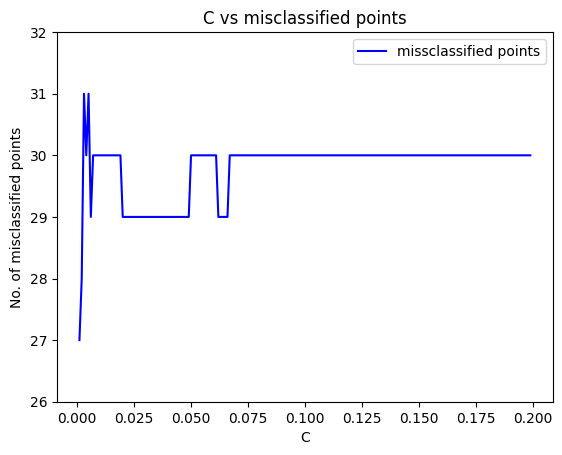

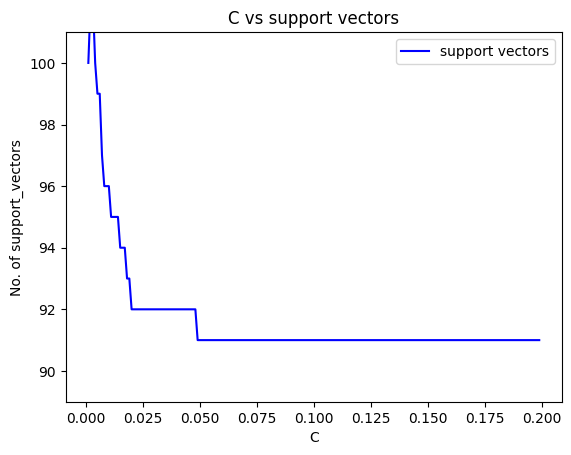

In [92]:
plt.plot(c_list, error_list, color = 'blue', label = 'missclassified points')
plt.xlabel('C')
plt.ylabel('No. of misclassified points')
plt.title('C vs misclassified points')
plt.legend()
plt.ylim(26, 32)
plt.show()

plt.plot(c_list, support_vector_list, color = 'blue', label = 'support vectors')
plt.xlabel('C')
plt.ylabel('No. of support_vectors')
plt.title('C vs support vectors')
plt.legend()
plt.ylim(89, 101)
plt.show()

In [93]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------------------- Plotting the optimal classifier ----------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [94]:
X = np.array(df[['speed', 'price']].values.tolist())
C = 0.0005

y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64) 
weight_vector_m, intercept_m, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_m, C)
weight_vector_n, intercept_n, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_n, C)
weight_vector_l, intercept_l, support_vectors = get_svm_weight_vector_and_intercept_having_linear_kernal(X, y_l, C)

In [95]:
y_pred_l = []
for idx in range(len(X)):
    y_pred_l.append(condition_function_having_linear_kernal(X[idx][0], X[idx][1]))

In [96]:
def plot_svm_hyperplanes_having_linear_kernal(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xlim(40, 80)
    plt.ylim(15, 50)
    plt.title("Hyperplanes obtained by Linear OVR SVM")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

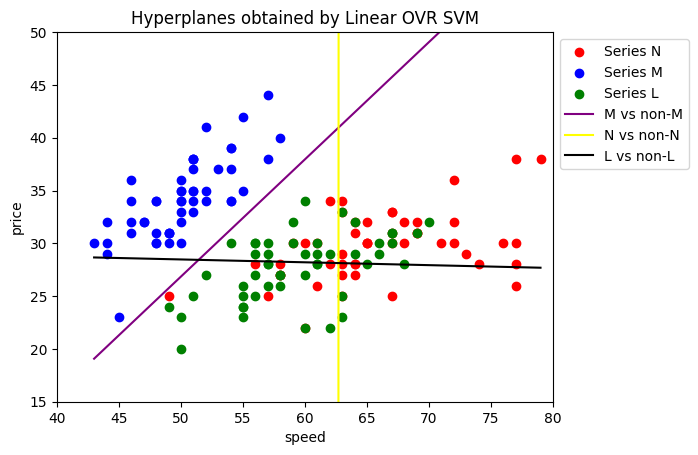

In [97]:
x_column = 'speed'
y_column = 'price'
dataframe = df.copy(deep=False)
x_values = df[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept_m) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_svm_hyperplanes_having_linear_kernal(df, line_x, line_y_m, line_y_n, line_y_l)

In [98]:
def plot_svm_decision_boundary_having_linear_kernal(C):
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_having_linear_kernal)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Linear Kernal SVM decision boundary C = {C}')
    plt.show()

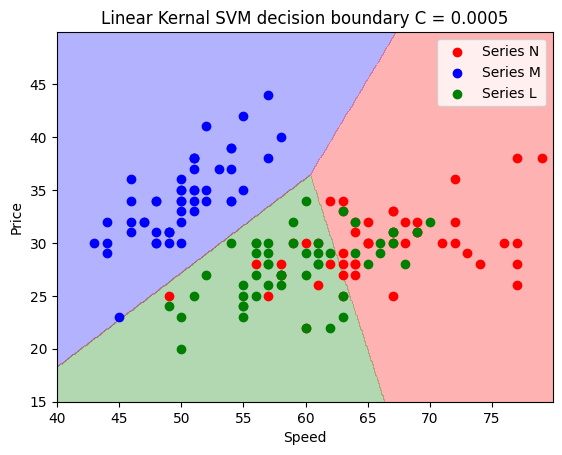

In [99]:
plot_svm_decision_boundary_having_linear_kernal(C)

In [100]:
# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------- Part 2 -----------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

In [117]:
# ----------------------------------------------------------------------------------------------------------------------
# ------------------------------------- Fitting polynomial kernal of degree 3 ------------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

In [127]:
def polynomial_kernel(X, Y, degree=3):
    return (1 + np.dot(X, Y.T)) ** degree

In [128]:
def get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y, C, degree):
    row, col = X.shape
    K = polynomial_kernel(X, X, degree)

    # Constructing optimization problem
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(row))
    A = cvxopt.matrix(y, (1, row))
    b = cvxopt.matrix(0.0)

    tmp1 = np.diag(np.ones(row) * -1)
    tmp2 = np.identity(row)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(row)
    tmp2 = np.ones(row) * C
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b, options={'show_progress': False})

    # Langrange dual
    a = np.ravel(solution['x'])
    sv = a > 1e-11
    sv_indices = np.arange(len(a))[sv]
    sv_a = a[sv]
    sv_X = X[sv]
    sv_y = y[sv]

    intercept = 0
    for n in range(len(sv_a)):
        intercept += sv_y[n]
        intercept -= np.sum(sv_a * sv_y * K[sv_indices[n], sv])
    intercept /= len(sv_a)

    return sv_a, sv_X, sv_y, intercept

In [129]:
def predict_svm_with_polynomial_kernel(x, sv_alpha, sv_X, sv_y, intercept, degree=3):
    kernel_matrix = polynomial_kernel(x, sv_X, degree)
    val = np.dot(kernel_matrix, sv_alpha * sv_y) + intercept
    return val

In [130]:
def condition_function_with_polynomial_kernal(x, y):
    value_1 = predict_svm_with_polynomial_kernel(np.array([x,y]), sv_a_m, sv_X_m, sv_y_m, intercept_m)
    value_2 = predict_svm_with_polynomial_kernel(np.array([x,y]), sv_a_n, sv_X_n, sv_y_n, intercept_n)
    value_3 = predict_svm_with_polynomial_kernel(np.array([x,y]), sv_a_l, sv_X_l, sv_y_l, intercept_l)
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [131]:
def accuracy_score(y_true, y_pred):
    correct_count = 0
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label == pred_label:
            correct_count += 1
    accuracy = correct_count / len(y_true)
    return accuracy

In [132]:
def plot_c_vs_avg_accuracy_score(c_list, average_testing_accuracy_scores):
    plt.plot(c_list, average_testing_accuracy_scores, marker='o', linestyle='-', color='blue', label='Testing Accuracy' )
    plt.xticks(c_list, rotation=60) 
    plt.xlabel('C')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score of polymomial kernal SVM having degree = 3 for different C values')
    plt.legend()
    plt.show()

In [133]:
# ----------------------------------------------------------------------------------------------------------------------
# ----------------------------- Finding Optimal penalty parameter of polynomial kernal ---------------------------------
# ----------------------------------------------------------------------------------------------------------------------

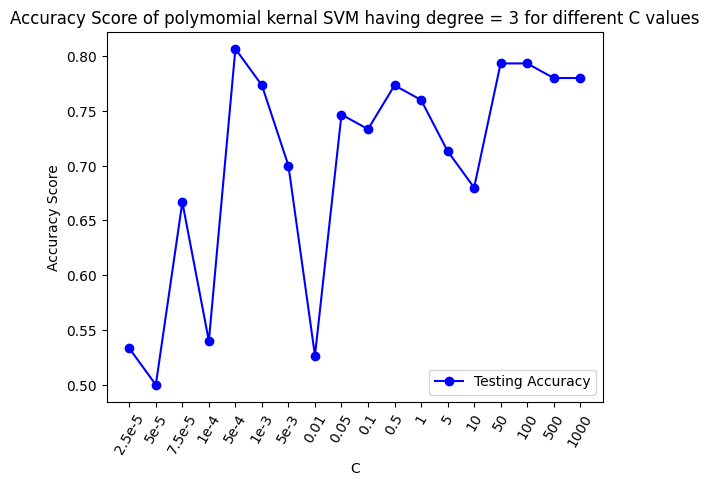

In [134]:
c_list = [0.000025, 0.00005, 0.000075, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
degree = 3
np.random.seed(10)

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

average_training_accuracy_scores_poly = []
average_testing_accuracy_scores_poly = []
num_folds = 5
fold_size = len(df) // num_folds

for c in c_list:
    
    training_accuracy_scores_poly = []
    testing_accuracy_scores_poly = []
    
    for _ in range (5):    
        indices = np.random.permutation(len(df))
        
        for i in range(num_folds):
            
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            y_train = np.array([y[j] for j in train_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_test = np.array([y[j] for j in test_idx])
    
            sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_m, c, degree)
            sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_n, c, degree)
            sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_l, c, degree)

                    
            y_test_pred_i_poly = []
            for idx in range(len(X_test)):
                y_test_pred_i_poly.append(condition_function_with_polynomial_kernal(X_test[idx][0], X_test[idx][1]))
    
            y_train_pred_i_poly = []
            for idx in range(len(X_train)):
                y_train_pred_i_poly.append(condition_function_with_polynomial_kernal(X_train[idx][0], X_train[idx][1]))
    
            testing_accuracy_scores_poly.append(accuracy_score(y_test, y_test_pred_i_poly))
            training_accuracy_scores_poly.append(accuracy_score(y_train, y_train_pred_i_poly))
        
    average_testing_accuracy_scores_poly.append(sum(testing_accuracy_scores_poly) / len(testing_accuracy_scores_poly))
    average_training_accuracy_scores_poly.append(sum(training_accuracy_scores_poly) / len(training_accuracy_scores_poly))
    

c_values = ['2.5e-5', '5e-5', '7.5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10', '50', '100', '500', '1000']
plot_c_vs_avg_accuracy_score(c_values, average_testing_accuracy_scores_poly)

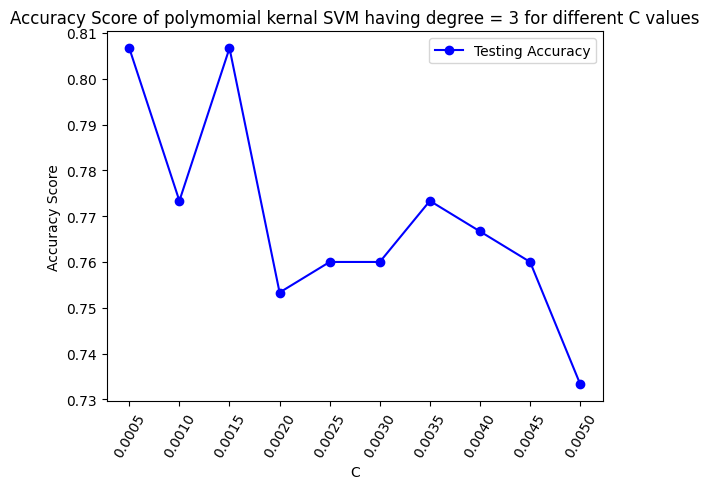

In [135]:
c_list = np.arange(0.0005, 0.0055, 0.0005)
np.random.seed(11)

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

average_training_accuracy_scores_poly = []
average_testing_accuracy_scores_poly = []
num_folds = 5
fold_size = len(df) // num_folds

for c in c_list:
    for _ in range (5):    
        indices = np.random.permutation(len(df))
        training_accuracy_scores_poly = []
        testing_accuracy_scores_poly = []
        
        for i in range(num_folds):
            
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            y_train = np.array([y[j] for j in train_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_test = np.array([y[j] for j in test_idx])
    
    
            sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_m, c, degree)
            sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_n, c, degree)
            sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_l, c, degree)
    
            y_test_pred_i_poly = []
            for idx in range(len(X_test)):
                y_test_pred_i_poly.append(condition_function_with_polynomial_kernal(X_test[idx][0], X_test[idx][1]))
    
            y_train_pred_i_poly = []
            for idx in range(len(X_train)):
                y_train_pred_i_poly.append(condition_function_with_polynomial_kernal(X_train[idx][0], X_train[idx][1]))
    
            testing_accuracy_scores_poly.append(accuracy_score(y_test, y_test_pred_i_poly))
            training_accuracy_scores_poly.append(accuracy_score(y_train, y_train_pred_i_poly))
        
    average_testing_accuracy_scores_poly.append(sum(testing_accuracy_scores_poly) / len(testing_accuracy_scores_poly))
    average_training_accuracy_scores_poly.append(sum(training_accuracy_scores_poly) / len(training_accuracy_scores_poly))
    
plot_c_vs_avg_accuracy_score(c_list, average_testing_accuracy_scores_poly)

In [ ]:
# ---------------------------------------------------------------------------------------------------------------
# ----------------------------- Optimal decision boundary of SVM with polynomial kernal -------------------------
# ---------------------------------------------------------------------------------------------------------------

In [136]:
def plot_svm_decision_boundary_with_polynomial_kernal(C, degree):
    x_min, x_max = 40, 80
    y_min, y_max = 15, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_with_polynomial_kernal)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Polynomial Kernal SVM decision boundary with C = {C} and degree = {degree}')
    plt.show()

In [174]:
degree = 3
C = 0.0015
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64) 

sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_m, C, degree)
sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_n, C, degree)
sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_l, C, degree)

In [175]:
y_pred_p = []
for idx in range(len(X)):
    y_pred_p.append(condition_function_with_polynomial_kernal(X[idx][0], X[idx][1]))

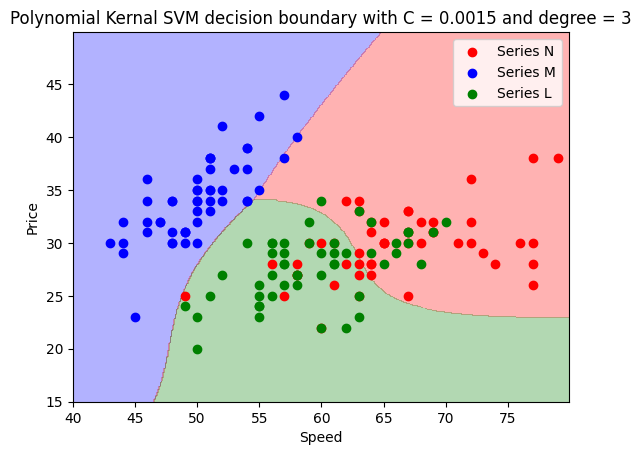

In [176]:
x_column = 'speed'
y_column = 'price'
dataframe = df.copy(deep=False)
plot_svm_decision_boundary_with_polynomial_kernal(C, degree)

In [140]:
# ---------------------------------------------------------------------------------------------------------
# -------------------------------------- Fitting RBF kernal -----------------------------------------------
# ---------------------------------------------------------------------------------------------------------

In [141]:
def rbf_kernel(X, Y, gamma):
    norm = np.sum(X**2, axis=1)[:, np.newaxis] + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * norm)

In [142]:
def get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y, C, gamma):
    row, col = X.shape
    K = rbf_kernel(X, X, gamma)

    # Constructing optimization problem
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(-np.ones(row))
    A = cvxopt.matrix(y, (1, row))
    b = cvxopt.matrix(0.0)

    tmp1 = np.diag(np.ones(row) * -1)
    tmp2 = np.identity(row)
    G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
    tmp1 = np.zeros(row)
    tmp2 = np.ones(row) * C
    h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b, options={'show_progress': False})

    # Langrange dual
    a = np.ravel(solution['x'])
    sv = a > 1e-5
    sv_indices = np.arange(len(a))[sv]
    sv_a = a[sv]
    sv_X = X[sv]
    sv_y = y[sv]

    intercept = 0
    for n in range(len(sv_a)):
        intercept += sv_y[n]
        intercept -= np.sum(sv_a * sv_y * K[sv_indices[n], sv])
    intercept /= len(sv_a)

    return sv_a, sv_X, sv_y, intercept

In [143]:
def predict_svm_with_rbf_kernel(x, sv_alpha, sv_X, sv_y, intercept):
    kernel_matrix = rbf_kernel(x, sv_X, gamma)
    val = np.dot(kernel_matrix, sv_alpha * sv_y) + intercept
    return val

In [144]:
def condition_function_with_rbf_kernel(x, y):
    value_1 = predict_svm_with_rbf_kernel(np.array([[x,y]]), sv_a_m, sv_X_m, sv_y_m, intercept_m)
    value_2 = predict_svm_with_rbf_kernel(np.array([[x,y]]), sv_a_n, sv_X_n, sv_y_n, intercept_n)
    value_3 = predict_svm_with_rbf_kernel(np.array([[x,y]]), sv_a_l, sv_X_l, sv_y_l, intercept_l)
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [145]:
def plot_c_vs_avg_accuracy_score(c_list, average_testing_accuracy_scores):
    plt.plot(c_list, average_testing_accuracy_scores, marker='o', linestyle='-', color='blue', label='Testing Accuracy' )
    plt.xticks(c_list, rotation=60) 
    plt.xlabel('C')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy Score of RBF kernal SVM having gamma = 0.05 for different C values')
    plt.legend()
    plt.show()

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# --------------------------------- Finding Optimal penalty parameter of RBF kernal ------------------------------------
# ----------------------------------------------------------------------------------------------------------------------

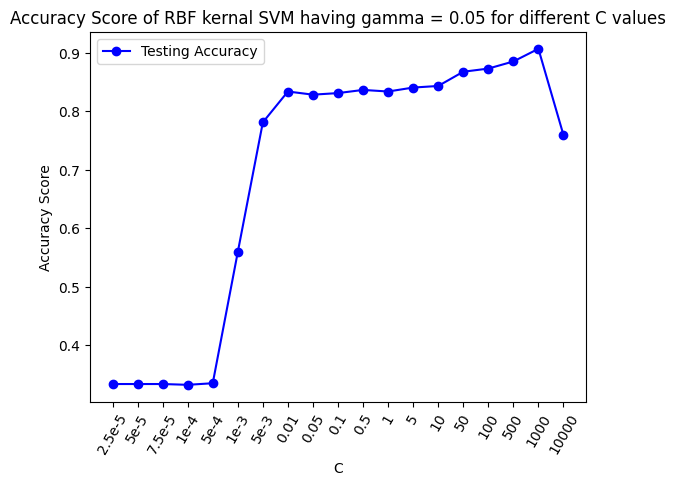

In [146]:
c_list = [0.000025, 0.00005, 0.000075, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 10000]
gamma = 0.05
np.random.seed(20)

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

average_training_accuracy_scores_rbf = []
average_testing_accuracy_scores_rbf = []
num_folds = 4
fold_size = len(df) // num_folds

for c in c_list:
    
    training_accuracy_scores_rbf = []
    testing_accuracy_scores_rbf = []
    
    for _ in range (5):    
        indices = np.random.permutation(len(df))
        for i in range(num_folds):
            
            
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            y_train = np.array([y[j] for j in train_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_test = np.array([y[j] for j in test_idx])
    
    
            sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_m, c, gamma)
            sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_n, c, gamma)
            sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_l, c, gamma)
    
            y_test_pred_i_rbf = []
            for idx in range(len(X_test)):
                y_test_pred_i_rbf.append(condition_function_with_rbf_kernel(X_test[idx][0], X_test[idx][1]))
    
            y_train_pred_i_rbf = []
            for idx in range(len(X_train)):
                y_train_pred_i_rbf.append(condition_function_with_rbf_kernel(X_train[idx][0], X_train[idx][1]))
    
            testing_accuracy_scores_rbf.append(accuracy_score(y_test, y_test_pred_i_rbf))
            training_accuracy_scores_rbf.append(accuracy_score(y_train, y_train_pred_i_rbf))
        
    average_testing_accuracy_scores_rbf.append(sum(testing_accuracy_scores_rbf) / len(testing_accuracy_scores_rbf))
    average_training_accuracy_scores_rbf.append(sum(training_accuracy_scores_rbf) / len(training_accuracy_scores_rbf))
    

c_values = ['2.5e-5', '5e-5', '7.5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10', '50', '100', '500', '1000', '10000']
plot_c_vs_avg_accuracy_score(c_values, average_testing_accuracy_scores_rbf)

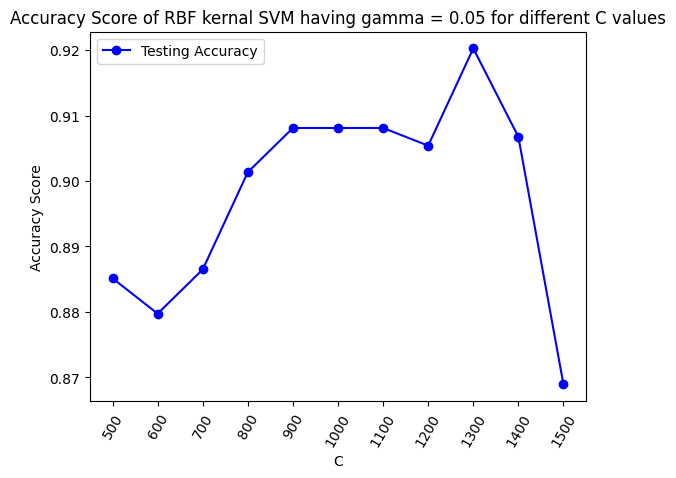

In [147]:
c_list = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
gamma = 0.05
np.random.seed(20)

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

average_training_accuracy_scores_rbf = []
average_testing_accuracy_scores_rbf = []
num_folds = 4
fold_size = len(df) // num_folds

for c in c_list:
    
    training_accuracy_scores_rbf = []
    testing_accuracy_scores_rbf = []
    
    for _ in range (5): 
        
        indices = np.random.permutation(len(df))
        
        for i in range(num_folds):
            
            start_idx = i * fold_size
            end_idx = (i+1) * fold_size
            
            test_idx = indices[start_idx:end_idx]
            train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
    
            X_train = np.array([X[j] for j in train_idx])
            y_train = np.array([y[j] for j in train_idx])
            y_train_m = np.array([y_m[j] for j in train_idx])
            y_train_n = np.array([y_n[j] for j in train_idx])
            y_train_l = np.array([y_l[j] for j in train_idx])
            X_test = np.array([X[j] for j in test_idx])
            y_test = np.array([y[j] for j in test_idx])
    
            y_train_pred_i_poly = []
            for idx in range(len(X_train)):
                y_train_pred_i_poly.append(condition_function_with_polynomial_kernal(X_train[idx][0], X_train[idx][1]))
    
            testing_accuracy_scores_poly.append(accuracy_score(y_test, y_test_pred_i_poly))
            training_accuracy_scores_poly.append(accuracy_score(y_train, y_train_pred_i_poly))
    
            sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_m, c, gamma)
            sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_n, c, gamma)
            sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_l, c, gamma)
    
            y_test_pred_i_rbf = []
            for idx in range(len(X_test)):
                y_test_pred_i_rbf.append(condition_function_with_rbf_kernel(X_test[idx][0], X_test[idx][1]))
    
            y_train_pred_i_rbf = []
            for idx in range(len(X_train)):
                y_train_pred_i_rbf.append(condition_function_with_rbf_kernel(X_train[idx][0], X_train[idx][1]))
    
            testing_accuracy_scores_rbf.append(accuracy_score(y_test, y_test_pred_i_rbf))
            training_accuracy_scores_rbf.append(accuracy_score(y_train, y_train_pred_i_rbf))
        
    average_testing_accuracy_scores_rbf.append(sum(testing_accuracy_scores_rbf) / len(testing_accuracy_scores_rbf))
    average_training_accuracy_scores_rbf.append(sum(training_accuracy_scores_rbf) / len(training_accuracy_scores_rbf))
    
plot_c_vs_avg_accuracy_score(c_list, average_testing_accuracy_scores_rbf)

In [ ]:
# ---------------------------------------------------------------------------------------------------------------
# ----------------------------- Optimal decision boundary of SVM with RBF kernal --------------------------------
# ---------------------------------------------------------------------------------------------------------------

In [148]:
def plot_svm_decision_boundary_with_rbf_kernal(C, gamma):
    x_min, x_max = 40, 80
    y_min, y_max = 18, 50
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_with_rbf_kernel)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'RBF Kernal SVM decision boundary with C = {C} and gamma = {gamma}')
    plt.show()

In [149]:
gamma = 0.05
C = 1300

X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64) 

sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_m, C, gamma)
sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_n, C, gamma)
sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_l, C, gamma)

In [150]:
y_pred_rbf = []
for idx in range(len(X)):
    y_pred_rbf.append(condition_function_with_rbf_kernel(X[idx][0], X[idx][1]))

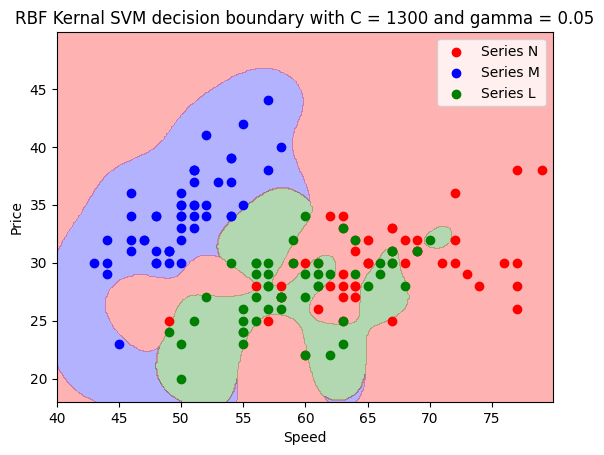

In [151]:
x_column = 'speed'
y_column = 'price'
dataframe = df.copy(deep=False)
plot_svm_decision_boundary_with_rbf_kernal(C, gamma)

In [152]:
# --------------------------------------------------------------------------------------------------------------------
# ------------------------------- Comparing polynomial and rbf kernal ------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [153]:
def plot_c_vs_avg_testing_accuracy_scores(c_list, average_testing_accuracy_scores_rbf, average_testing_accuracy_scores_poly, gamma):
    plt.plot(c_list, average_testing_accuracy_scores_rbf, marker='o', linestyle='-', color='blue', label='RBF kernal testing accuracy' )
    plt.plot(c_list, average_testing_accuracy_scores_poly, marker='o', linestyle='-', color='green', label='Poly kernal testing accuracy' )
    plt.xticks(c_list, rotation=60) 
    plt.xlabel('C')
    plt.ylabel('Accuracy Score')
    plt.title(f'Testing accuracy Score for different C values with Gamma = {gamma} and Degree = 3')
    plt.legend()
    plt.ylim(0,1.0)
    plt.show()

In [154]:
def plot_c_vs_avg_training_accuracy_scores(c_list, average_training_accuracy_scores_rbf, average_training_accuracy_scores_poly, gamma):
    plt.plot(c_list, average_training_accuracy_scores_rbf, marker='o', linestyle='-', color='blue', label='RBF kernal training accuracy' )
    plt.plot(c_list, average_training_accuracy_scores_poly, marker='o', linestyle='-', color='green', label='Poly kernal training accuracy' )
    plt.xticks(c_list, rotation=60) 
    plt.xlabel('C')
    plt.ylabel('Accuracy Score')
    plt.title(f'Training accuracy Score for different C values having Gamma = {gamma} and Degree = 3')
    plt.legend()
    plt.ylim(0,1.0)
    plt.show()

In [155]:
# ---------------------------------------------------------------------------------------------------------------
# ------------ Comparining between polynomial kernal and RBF kernal using K-cross validation  -------------------
# ---------------------------------------------------------------------------------------------------------------

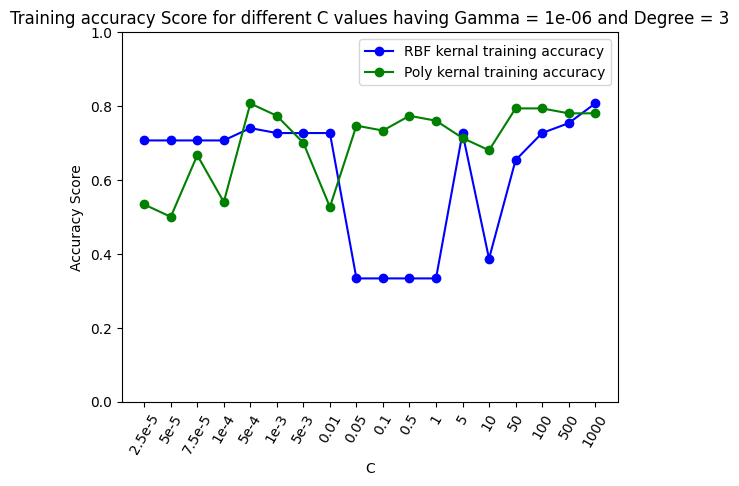

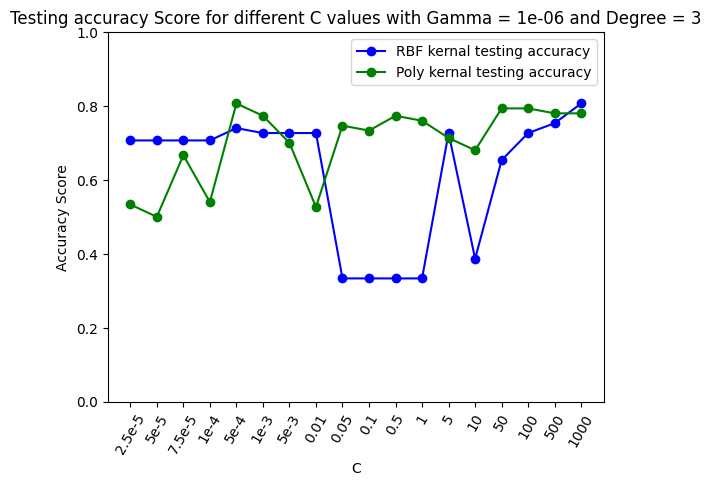

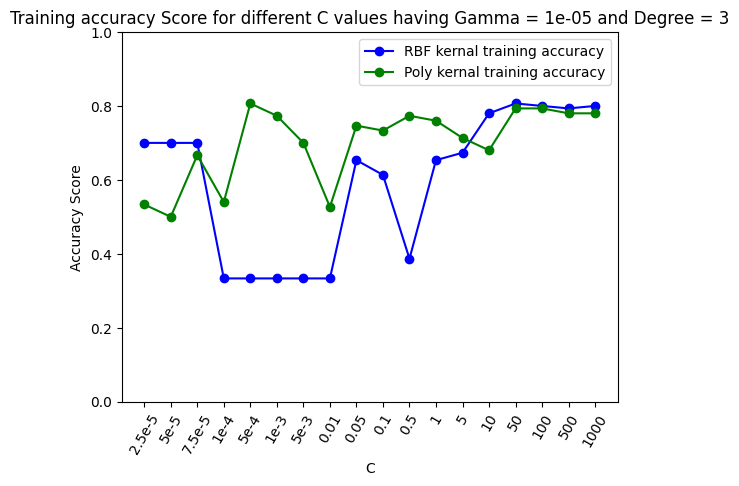

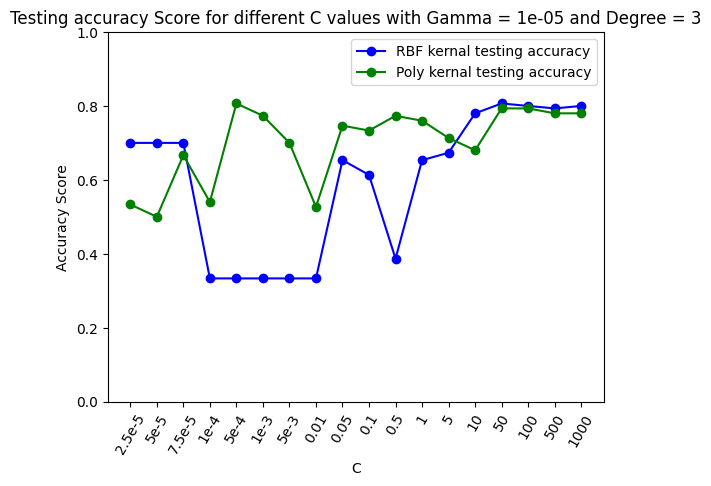

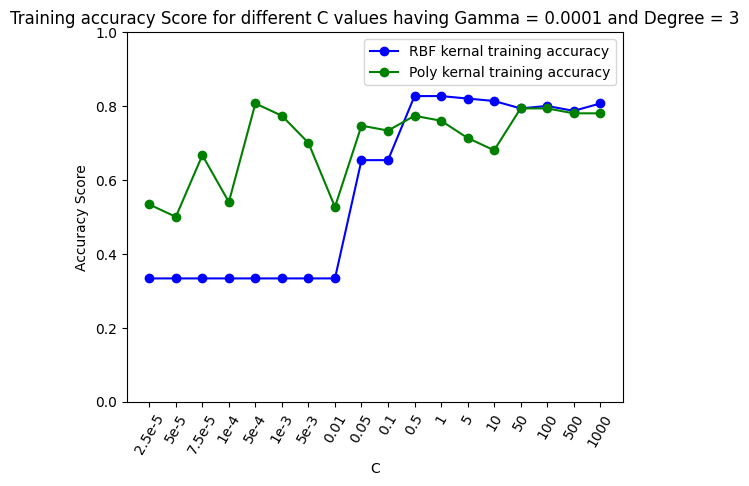

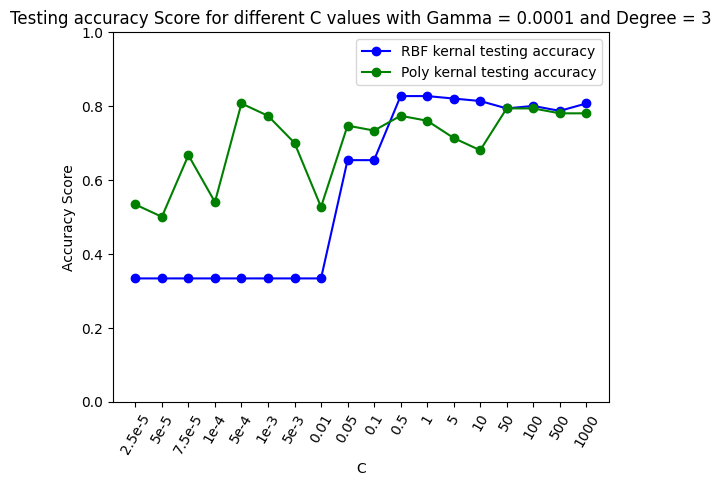

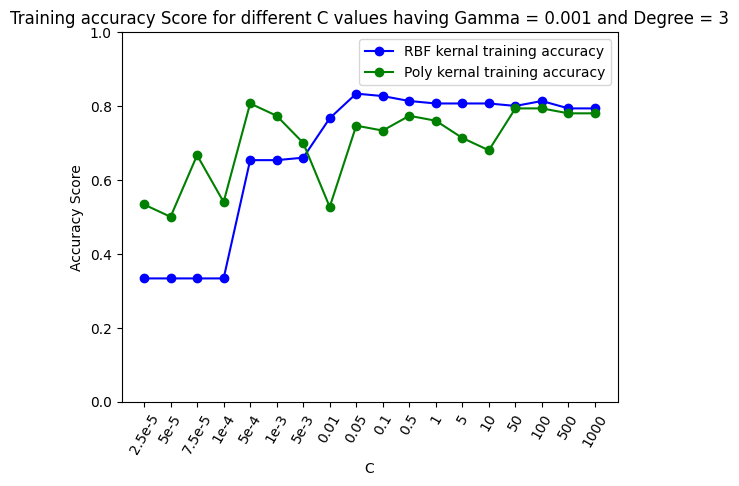

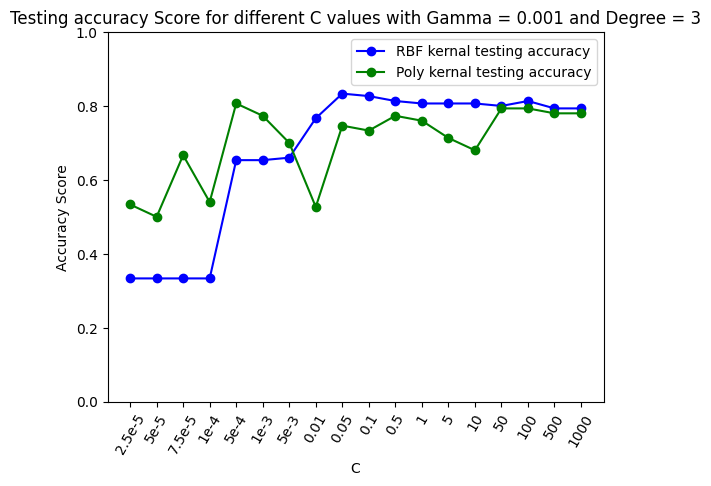

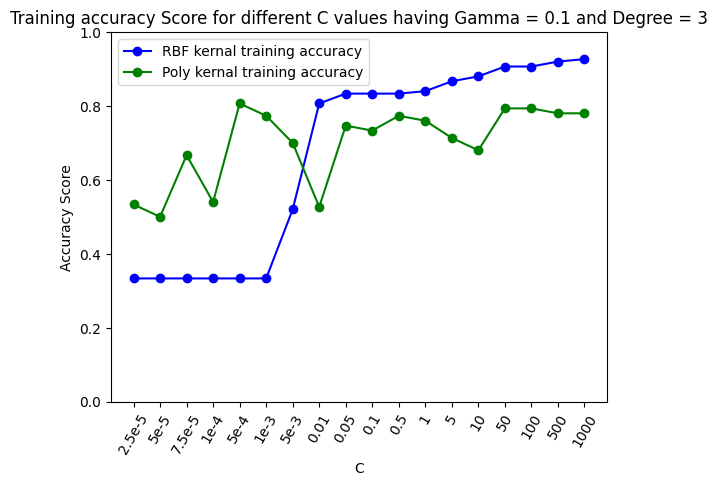

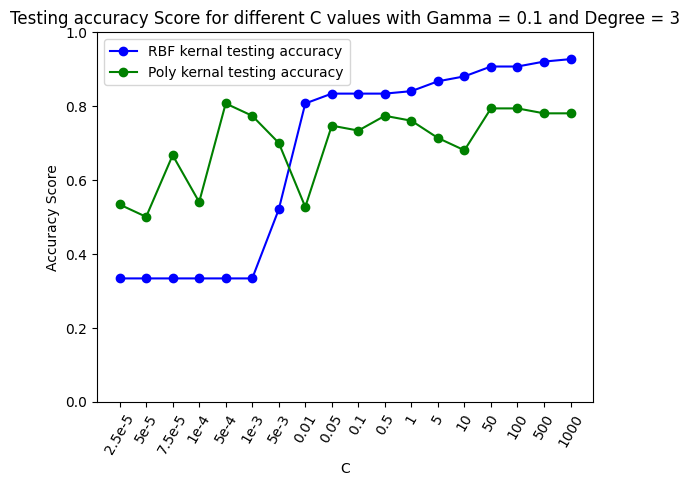

In [ ]:
degree = 3
c_list = [0.000025, 0.00005, 0.000075, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]

X = np.array(df[['speed', 'price']].values.tolist())
y = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

np.random.seed(200)
gammas = [0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]
for gamma in gammas:
    
    average_training_accuracy_scores_poly = []
    average_testing_accuracy_scores_poly = []
    average_training_accuracy_scores_rbf = []
    average_testing_accuracy_scores_rbf = []
    
    num_folds = 5
    fold_size = len(df) // num_folds
    
    for c in c_list:
            
        training_accuracy_scores_poly = []
        testing_accuracy_scores_poly = []
        training_accuracy_scores_rbf = []
        testing_accuracy_scores_rbf = []

        for _ in range (5):
        
            indices = np.random.permutation(len(df))
            
            for i in range(num_folds):
                
                start_idx = i * fold_size
                end_idx = (i+1) * fold_size
                
                test_idx = indices[start_idx:end_idx]
                train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
                X_train = np.array([X[j] for j in train_idx])
                y_train = np.array([y[j] for j in train_idx])
                y_train_m = np.array([y_m[j] for j in train_idx])
                y_train_n = np.array([y_n[j] for j in train_idx])
                y_train_l = np.array([y_l[j] for j in train_idx])
                X_test = np.array([X[j] for j in test_idx])
                y_test = np.array([y[j] for j in test_idx])
        
                sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_m, c, degree)
                sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_n, c, degree)
                sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_polynomial_kernal(X, y_l, c, degree)
        
                y_test_pred_i_poly = []
                for idx in range(len(X_test)):
                    y_test_pred_i_poly.append(condition_function_with_polynomial_kernal(X_test[idx][0], X_test[idx][1]))
        
                y_train_pred_i_poly = []
                for idx in range(len(X_train)):
                    y_train_pred_i_poly.append(condition_function_with_polynomial_kernal(X_train[idx][0], X_train[idx][1]))
        
                testing_accuracy_scores_poly.append(accuracy_score(y_test, y_test_pred_i_poly))
                training_accuracy_scores_poly.append(accuracy_score(y_train, y_train_pred_i_poly))
        
                sv_a_m, sv_X_m, sv_y_m, intercept_m = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_m, c, gamma)
                sv_a_n, sv_X_n, sv_y_n, intercept_n = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_n, c, gamma)
                sv_a_l, sv_X_l, sv_y_l, intercept_l = get_svm_weight_vector_and_intercept_having_rbf_kernal(X, y_l, c, gamma)
        
                y_test_pred_i_rbf = []
                for idx in range(len(X_test)):
                    y_test_pred_i_rbf.append(condition_function_with_rbf_kernel(X_test[idx][0], X_test[idx][1]))
        
                y_train_pred_i_rbf = []
                for idx in range(len(X_train)):
                    y_train_pred_i_rbf.append(condition_function_with_rbf_kernel(X_train[idx][0], X_train[idx][1]))
        
                testing_accuracy_scores_rbf.append(accuracy_score(y_test, y_test_pred_i_rbf))
                training_accuracy_scores_rbf.append(accuracy_score(y_train, y_train_pred_i_rbf))
            
        average_testing_accuracy_scores_poly.append(sum(testing_accuracy_scores_poly) / len(testing_accuracy_scores_poly))
        average_training_accuracy_scores_poly.append(sum(training_accuracy_scores_poly) / len(training_accuracy_scores_poly))
        average_testing_accuracy_scores_rbf.append(sum(testing_accuracy_scores_rbf) / len(testing_accuracy_scores_rbf))
        average_training_accuracy_scores_rbf.append(sum(training_accuracy_scores_rbf) / len(training_accuracy_scores_rbf))

    c_values = ['2.5e-5', '5e-5', '7.5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10', '50', '100', '500', '1000']
    plot_c_vs_avg_training_accuracy_scores(c_values, average_training_accuracy_scores_rbf, average_training_accuracy_scores_poly, gamma)
    
    c_values = ['2.5e-5', '5e-5', '7.5e-5', '1e-4', '5e-4', '1e-3', '5e-3', '0.01', '0.05', '0.1', '0.5', '1', '5', '10', '50', '100', '500', '1000']
    plot_c_vs_avg_testing_accuracy_scores(c_values, average_testing_accuracy_scores_rbf, average_testing_accuracy_scores_poly,gamma)

In [ ]:
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------
# ------------------3. Evaluating classifier performance using precision, recall and f1-score. -----------------------
# --------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------

In [157]:
def plot_evalution_metrices(classifier, evalution_metric, title, xlabel, ylabel):
    plt.figure(figsize=(4, 4))
    plt.bar(classifier, evalution_metric, color='green', width=0.2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0, 1)
    plt.title(title)
    plt.show()

In [158]:
y_true = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)

In [159]:
classifier = ['Linear', 'Polynomial Kernal', 'RBF Kernal']
Class = ['Series M', 'Series L', 'Series N']
precision_per_class_l = precision_score(y_true, y_pred_l, average=None)
macro_precision_l = precision_score(y_true, y_pred_l, average='macro')
micro_precision_l = precision_score(y_true, y_pred_l, average='micro')

precision_per_class_p = precision_score(y_true, y_pred_p, average=None)
macro_precision_p = precision_score(y_true, y_pred_p, average='macro')
micro_precision_p = precision_score(y_true, y_pred_p, average='micro')

precision_per_class_rbf = precision_score(y_true, y_pred_rbf, average=None)
macro_precision_rbf = precision_score(y_true, y_pred_rbf, average='macro')
micro_precision_rbf = precision_score(y_true, y_pred_rbf, average='micro')

macro_precision = [macro_precision_l, macro_precision_p, macro_precision_rbf]
micro_precision = [micro_precision_l, micro_precision_p, micro_precision_rbf]

In [160]:
print("Precision per Class of Linear kernal:", precision_per_class_l)
print("Precision per Class of Poly. kernal: ", precision_per_class_p)
print("Precision per Class of RBF kernal: ", precision_per_class_rbf)
print("Macro Precision of Classifier: ", macro_precision)
print("Micro Precision of Classifer: ", micro_precision)

Precision per Class of Linear kernal: [1.         0.75       0.73076923]
Precision per Class of Poly. kernal:  [0.96153846 0.73333333 0.60294118]
Precision per Class of RBF kernal:  [1.         0.86538462 0.89583333]
Macro Precision of Classifier:  [0.826923076923077, 0.7659376571141276, 0.920405982905983]
Micro Precision of Classifer:  [0.8266666666666667, 0.7533333333333333, 0.92]


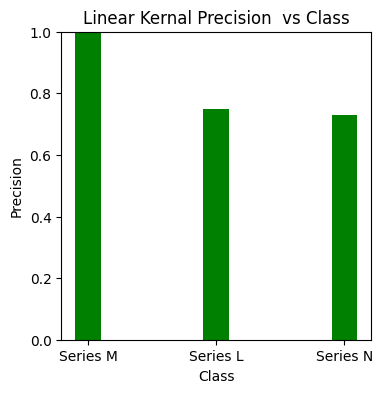

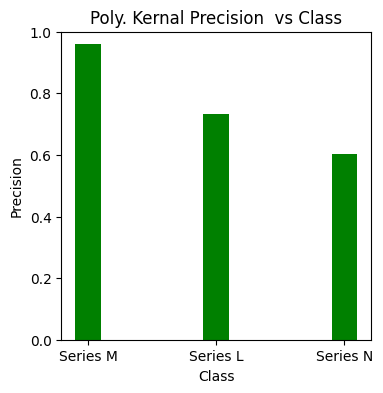

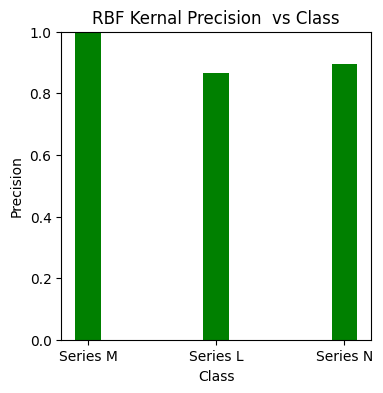

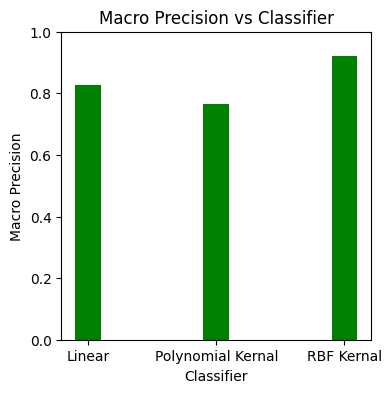

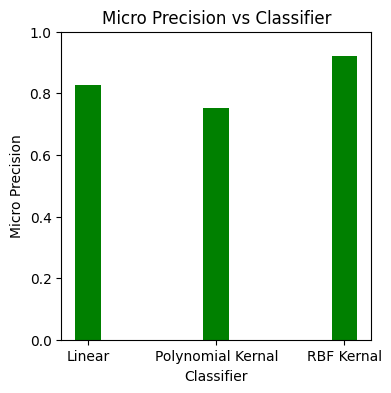

In [161]:
plot_evalution_metrices(Class, precision_per_class_l, 'Linear Kernal Precision  vs Class', 'Class', 'Precision')
plot_evalution_metrices(Class, precision_per_class_p, 'Poly. Kernal Precision  vs Class', 'Class', 'Precision')
plot_evalution_metrices(Class, precision_per_class_rbf, 'RBF Kernal Precision  vs Class', 'Class', 'Precision')
plot_evalution_metrices(classifier, macro_precision, 'Macro Precision vs Classifier', 'Classifier','Macro Precision')
plot_evalution_metrices(classifier, micro_precision, 'Micro Precision vs Classifier', 'Classifier', 'Micro Precision')

In [162]:
classifier = ['Linear', 'Polynomial Kernal', 'RBF Kernal']
Class = ['Series M', 'Series L', 'Series N']
recall_per_class_l = recall_score(y_true, y_pred_l, average=None)
macro_recall_l = recall_score(y_true, y_pred_l, average='macro')
micro_recall_l = recall_score(y_true, y_pred_l, average='micro')

recall_per_class_p = recall_score(y_true, y_pred_p, average=None)
macro_recall_p = recall_score(y_true, y_pred_p, average='macro')
micro_recall_p = recall_score(y_true, y_pred_p, average='micro')

recall_per_class_rbf = recall_score(y_true, y_pred_rbf, average=None)
macro_recall_rbf = recall_score(y_true, y_pred_rbf, average='macro')
micro_recall_rbf = recall_score(y_true, y_pred_rbf, average='micro')

macro_recall = [macro_recall_l, macro_recall_p, macro_recall_rbf]
micro_recall = [micro_recall_l, micro_recall_p, micro_recall_rbf]

In [163]:
print("Recall per Class of Linear Kernal:", recall_per_class_l)
print("Recall per Class of Poly. Kernal: ", recall_per_class_p)
print("Recall per Class of RBF Kernal: ", recall_per_class_rbf)
print("Macro Recall of Classifier: ", macro_recall)
print("Micro Recall of Classifer: ", micro_recall)

Recall per Class of Linear Kernal: [1.   0.72 0.76]
Recall per Class of Poly. Kernal:  [1.   0.44 0.82]
Recall per Class of RBF Kernal:  [1.   0.9  0.86]
Macro Recall of Classifier:  [0.8266666666666667, 0.7533333333333333, 0.9199999999999999]
Micro Recall of Classifer:  [0.8266666666666667, 0.7533333333333333, 0.92]


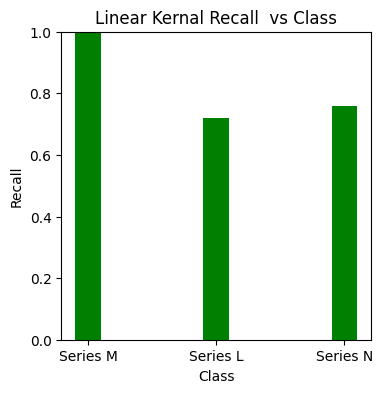

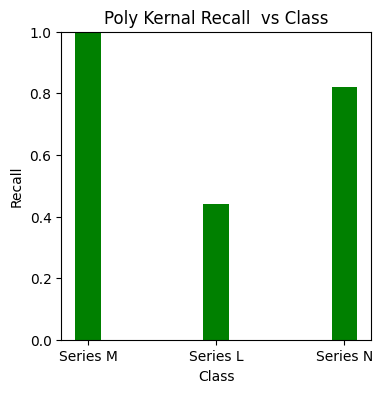

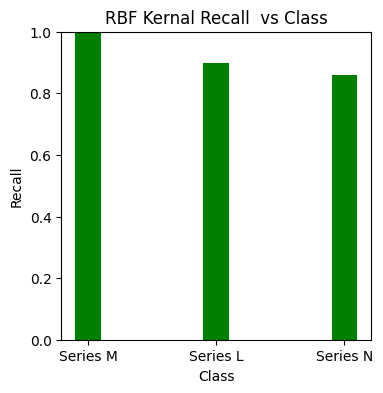

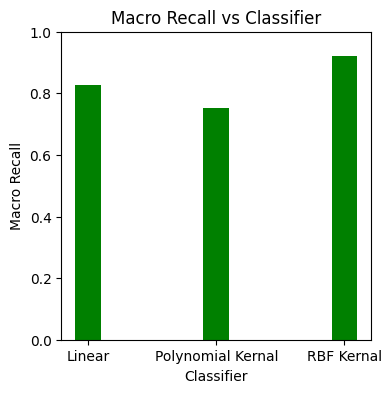

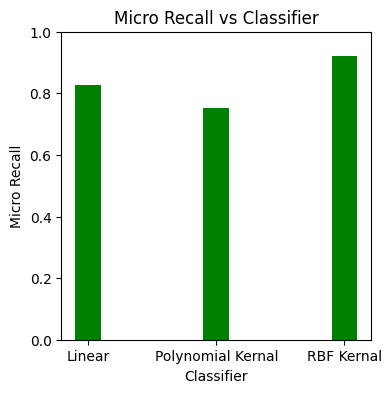

In [164]:
plot_evalution_metrices(Class, recall_per_class_l, 'Linear Kernal Recall  vs Class', 'Class', 'Recall')
plot_evalution_metrices(Class, recall_per_class_p, 'Poly Kernal Recall  vs Class', 'Class', 'Recall')
plot_evalution_metrices(Class, recall_per_class_rbf, 'RBF Kernal Recall  vs Class', 'Class', 'Recall')
plot_evalution_metrices(classifier, macro_recall, 'Macro Recall vs Classifier', 'Classifier','Macro Recall')
plot_evalution_metrices(classifier, micro_recall, 'Micro Recall vs Classifier', 'Classifier', 'Micro Recall')

In [165]:
classifier = ['Linear', 'Polynomial Kernal', 'RBF Kernal']
Class = ['Series M', 'Series L', 'Series N']
f1_per_class_l = f1_score(y_true, y_pred_l, average=None)
macro_f1_l = f1_score(y_true, y_pred_l, average='macro')
micro_f1_l = f1_score(y_true, y_pred_l, average='micro')

f1_per_class_p = f1_score(y_true, y_pred_p, average=None)
macro_f1_p = f1_score(y_true, y_pred_p, average='macro')
micro_f1_p = f1_score(y_true, y_pred_p, average='micro')

f1_per_class_rbf = f1_score(y_true, y_pred_rbf, average=None)
macro_f1_rbf = f1_score(y_true, y_pred_rbf, average='macro')
micro_f1_rbf = f1_score(y_true, y_pred_rbf, average='micro')

macro_f1 = [macro_f1_l, macro_f1_p, macro_f1_rbf]
micro_f1 = [micro_f1_l, micro_f1_p, micro_f1_rbf]

In [166]:
print("F1 Score per Class of Linear Kernal:", f1_per_class_l)
print("F1 Score per Class of Poly. Kernal: ", f1_per_class_p)
print("F1 Score per Class of RBF Kernal: ", f1_per_class_rbf)
print("Macro F1 Score of Classifier: ", macro_f1)
print("Micro F1 Score of Classifer: ", micro_f1)

F1 Score per Class of Linear Kernal: [1.         0.73469388 0.74509804]
F1 Score per Class of Poly. Kernal:  [0.98039216 0.55       0.69491525]
F1 Score per Class of RBF Kernal:  [1.         0.88235294 0.87755102]
Macro F1 Score of Classifier:  [0.8265973055889022, 0.7417691370333444, 0.9199679871948779]
Micro F1 Score of Classifer:  [0.8266666666666667, 0.7533333333333333, 0.92]


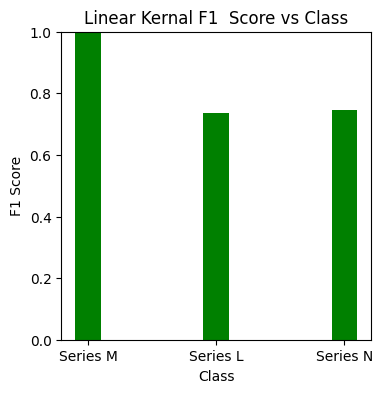

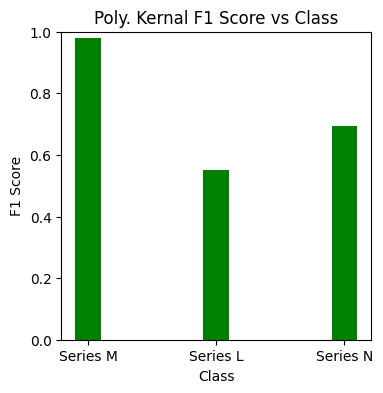

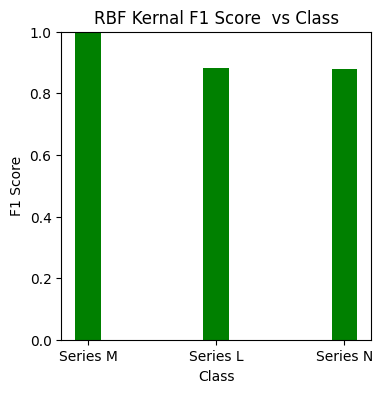

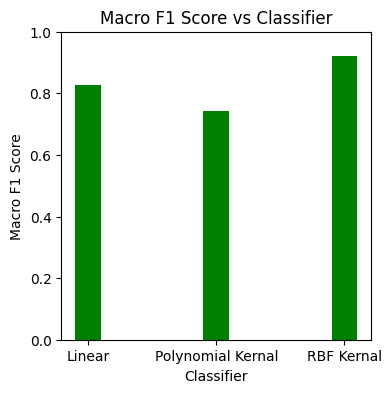

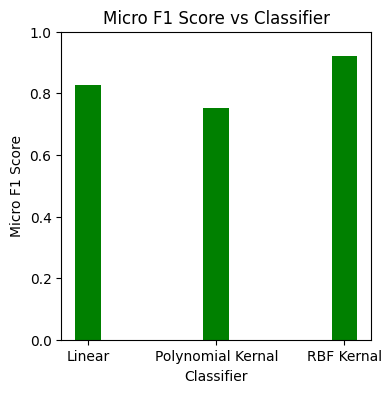

In [167]:
plot_evalution_metrices(Class, f1_per_class_l, 'Linear Kernal F1  Score vs Class', 'Class', 'F1 Score')
plot_evalution_metrices(Class, f1_per_class_p, 'Poly. Kernal F1 Score vs Class', 'Class', 'F1 Score')
plot_evalution_metrices(Class, f1_per_class_rbf, 'RBF Kernal F1 Score  vs Class', 'Class', 'F1 Score')
plot_evalution_metrices(classifier, macro_f1, 'Macro F1 Score vs Classifier', 'Classifier','Macro F1 Score')
plot_evalution_metrices(classifier, micro_f1, 'Micro F1 Score vs Classifier', 'Classifier', 'Micro F1 Score')

**TASK 3**: Decision Tree and Gradient Boosted Trees                      **(27 Marks)**

### **Gradient Boosted Trees**

**Decision Trees:** Decision trees are the base learners used in GBT. These are simple tree-like structures where each internal node represents a decision based on a feature, and each leaf node represents the output label. Each decision tree in the ensemble is trained on a subset of the data.

**Boosting:** GBT uses boosting, a technique where each subsequent model tries to correct the errors made by the previous ones. In boosting, the models are trained sequentially, and at each iteration, the new model focuses on the examples that were misclassified by the previous models.

**Gradient Descent:** In GBT, the boosting process involves gradient descent optimization. During each iteration, the algorithm calculates the gradient of the loss function with respect to the ensemble's prediction. Then, it fits a new decision tree to the gradient values (residuals), effectively reducing the errors made by the previous models.

**Gradient Boosting:** In gradient boosting, the idea is to fit the new model (in this case, a decision tree) to the residual errors of the previous model. This means that each new tree is trained to predict the residuals, which are the differences between the actual values and the predictions of the ensemble so far.

**Learning Rate:** GBT introduces a parameter called the learning rate, which controls the contribution of each tree to the ensemble. A smaller learning rate makes the model more robust but requires more trees to be added to the ensemble.

**Ensemble Aggregation:** The final prediction of the GBT model is obtained by aggregating the predictions of all the individual decision trees (each is a form of weak learner) in the ensemble, typically through a weighted sum.

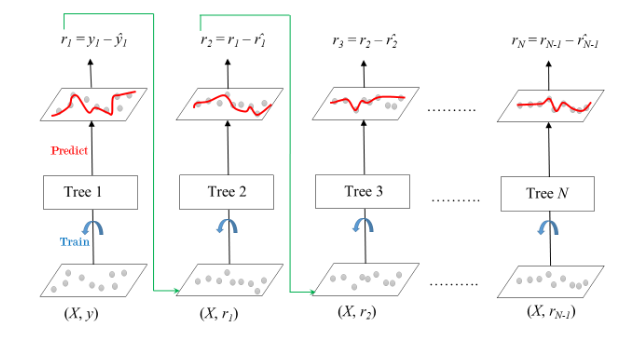


Now lets change the dataset and load dataset given below.

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing a bank clients. Load the dataset "bank_data.csv". The task is to predict whether the client defined by the given set of attributes earns will subscirbe to a term deposit. Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the client defined by the given set of attributes earns will subscirbe to a term deposit or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (7 + 1 + 3 Marks)

2. Create 10 weak learners using code for the decision tree written previously.
If your model overfits or underfits then you can decrease or increase the number of weak learners. To optimize the ensemble there is going to be a trade off between learning rate and number of weak learners. Try to find the optimal learning rate and number of weak learners.  (5 + 6 Marks)

 y(pred) = (lr *  r1) + (lr * r2) + ....... + (lr * rN)

 Report the error on final prediction by using the formula given above. Did the performance improve? Report your findings. (You can fix number of nodes as best value obtained in previous part). (5 Marks)

Write your code by creating cells below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('future.no_silent_downcasting', True)

In [3]:
df = pd.read_csv('bank_data.csv')

In [4]:
df['y'] = df['y'].replace({'no': 0, 'yes': 1})

In [5]:
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# --------------------------------------------- Part 1 ----------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [6]:
# ---------------------------------------------------------------------------------------------------------------------
# ------------------------------1.1 Implement decision tree algorithm to classify. ------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [7]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      
        self.threshold = threshold  
        self.left = left           
        self.right = right          
        self.value = value       

In [8]:
def fit(X, y):
    root = fit_tree(X, y)
    return root

def fit_tree(X, y, depth=0):
        rows, columns = X.shape
        num_classes = len(np.unique(y))
        num_samples_per_class = [np.sum(y == i) for i in range(num_classes)]
        most_common_class = np.argmax(num_samples_per_class)
        
        if len(np.unique(y)) == 1 or depth == max_depth:
            return Node(value=most_common_class)
        
        best_gain = -1
        best_feature = None
        best_threshold = None
        for feature_name in X.columns:
            feature_values = np.unique(X[feature_name])
            
            if len(feature_values) == 1: 
                continue
                
            for value in feature_values:
                left_indices = X.index[X[feature_name] == value]
                right_indices = X.index[X[feature_name] != value]
                left_entropy = calculate_entropy(y[left_indices])
                right_entropy = calculate_entropy(y[right_indices])
                entropy = (len(left_indices) / rows) * left_entropy + (len(right_indices) / rows) * right_entropy
                       
                gain = calculate_information_gain(calculate_entropy(y), entropy)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_name
                    best_threshold = value
        
        if best_gain == 0:  
            return Node(value=most_common_class)
        
        left_indices = X.index[X[best_feature] == best_threshold]
        right_indices = X.index[X[best_feature] != best_threshold]
        
        left_child = fit_tree(X.loc[left_indices], y.loc[left_indices], depth + 1)
        right_child = fit_tree(X.loc[right_indices], y.loc[right_indices], depth + 1)
        
        return Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

def calculate_entropy(y):
    if len(y) == 0:
        return 0
    num_classes = len(np.unique(y))
    num_samples = len(y)
    num_samples_per_class = [np.sum(y == i) for i in range(num_classes)]
    class_probabilities = [num_samples_i / num_samples for num_samples_i in num_samples_per_class]
    entropy = -sum(p * np.log2(p) for p in class_probabilities if p != 0)
    return entropy

def calculate_information_gain(parent_entropy, children_entropy):
    return parent_entropy - children_entropy

def predict_X(root, X):
    return np.array([predict_x(x, root) for _, x in X.iterrows()])

def predict_x(x, node):
    if node.value is not None:
        return node.value
    if x[node.feature] == node.threshold:
        return predict_x(x, node.left)
    else:
        return predict_x(x, node.right)

In [9]:
# ---------------------------------------------------------------------------------------------------------------------
# -----------------------------------1.2 Splitting data into training and testing. ------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [10]:
def split_into_training_and_testing(X, y, test_size = 0.2, random_state = 42):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    n_test_samples = int(test_size * n_samples)
    test_indices = indices[:n_test_samples]
    train_indices = indices[n_test_samples:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [11]:
def accuracy_score(y_pred, y_true):
    accuracy = len(y_pred)
    for i in range(len(y_pred)):
        if y_pred.iloc[i]!=y_true[i]:
            accuracy-=1
    return accuracy/len(y_pred)

In [12]:
X = df.drop(columns=['y']) 
y = df['y'] 

X_train, X_test, y_train, y_test = split_into_training_and_testing(X, y, test_size = 0.2, random_state = 1065)

In [ ]:
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------1.3 Plotting training and testing accuracy with height. ----------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [189]:
heights = []
training_accuracies = []
testing_accuracies = []

for i in range(1, 31):

    heights.append(i)
    max_depth = i
    num_classes = len(np.unique(y_train))

    root = fit(X_train, y_train)
    
    y_pred_train = predict_X(root, X_train)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred_test = predict_X(root, X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_test)

    training_accuracies.append(training_accuracy)
    testing_accuracies.append(testing_accuracy)

In [24]:
def plot_training_and_test_accuracy(heights, training_accuracies, testing_accuracies):
    plt.plot(heights, training_accuracies, color='green', label='Training accuracy')
    plt.plot(heights, testing_accuracies, color='yellow', label='Testing accuracy')
    plt.xlabel('Height')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy score vs Height')
    plt.legend()
    plt.grid(True)
    plt.show()

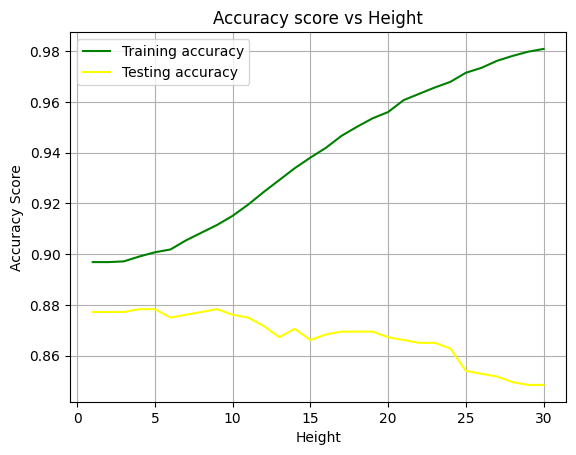

In [191]:
plot_training_and_test_accuracy(heights, training_accuracies, testing_accuracies)

In [ ]:
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# ----------------------------2.1 Creating 10 weak learners using decision tree code. ---------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [13]:
def fit_gradient_boosting_decision_trees(X, y, num_iterations, learning_rate):
    trees =[]
    residuals = y.copy()
    for _ in range(num_iterations):
        num_classes = len(np.unique(residuals))
        root = fit(X, residuals)
        predictions = predict_X(root, X)
        residuals -= learning_rate * predictions
        trees.append(root)
    return trees

def predict(X, trees, learning_rate):
    predictions = np.zeros(len(X))
    for root in trees:
        predictions += learning_rate * predict_X(root, X)
    proba = 1 / (1 + np.exp(-predictions+0.5))
    return (proba > 0.5).astype(int)

def predict_by_iterations(X, trees, learning_rate, num_iteration):
    predictions = np.zeros(len(X))
    for idx in range(num_iteration):
        predictions += learning_rate * predict_X(trees[idx], X)
    proba = 1 / (1 + np.exp(-predictions+0.5))
    return (proba > 0.5).astype(int)

In [14]:
X = df.drop(columns=['y']) 
y = df['y'] 

np.random.seed(110)
X_train, X_test, y_train, y_test = split_into_training_and_testing(X, y, test_size = 0.2, random_state = 165)

max_depth = 5
weak_leaners = 10
learning_rate = 0.1
trees = fit_gradient_boosting_decision_trees(X_train, y_train, weak_leaners, learning_rate)

y_pred_train = predict(X_train, trees, learning_rate)
training_accuracy = accuracy_score(y_train, y_pred_train)

y_pred_test = predict(X_test, trees, learning_rate)
testing_accuracy = accuracy_score(y_test, y_pred_test)

print("Number of weak learner : ", weak_leaners)
print("Leaning rate : ", learning_rate)
print("Max Depth : ", max_depth)
print("Training Accuracy = ", training_accuracy)
print("Testing Accuracy = ", testing_accuracy)

Number of weak learner :  10
Leaning rate :  0.1
Max Depth :  5
Training Accuracy =  0.8866463920376002
Testing Accuracy =  0.8772123893805309


In [15]:
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# ----------------------------2.2 Finding optimal learning rate and number of weak learners. --------------------------
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

In [16]:
def plot_training_and_testing_accuracy_with_learning_rate_and_max_depth(num_iterations, training_accuracies, testing_accuracies, learning_rate, max_depth):
    plt.plot(num_iterations, training_accuracies, color='green', linestyle='-', label='Training Accuracy')
    plt.plot(num_iterations, testing_accuracies, color='yellow', linestyle='-', label='Testing Accuracy')
    plt.xlabel('Number of weak leaners')
    plt.ylabel('Accuracy')
    plt.title(f"Scatter plot accuracy vs number of leaners (β = {learning_rate}, Max depth = {max_depth})")
    plt.legend()
    plt.grid()
    plt.show()

In [20]:
num_iterations = [3, 5, 8, 10, 15, 20]
max_iterations = 30
learning_rates = [0.01, 0.1, 0.3, 0.6, 0.8, 1, 5, 10]
num_iterations_str = ['3', '5', '8', '10', '15', '20']
np.random.seed(110)
for max_depth in range(5, 2, -1):
    for learning_rate in learning_rates:
        training_accuracies = []
        testing_accuracies = []
        X = df.drop(columns=['y']) 
        y = df['y'] 
        
        X_train, X_test, y_train, y_test = split_into_training_and_testing(X, y, test_size = 0.2, random_state = 165)
        
        trees = fit_gradient_boosting_decision_trees(X_train, y_train, max_iterations, learning_rate)

        for num_iteration in num_iterations:
            y_pred_train = predict_by_iterations(X_train, trees, learning_rate, num_iteration)
            training_accuracy = accuracy_score(y_train, y_pred_train)
            
            y_pred_test = predict_by_iterations(X_test, trees, learning_rate, num_iteration)
            testing_accuracy = accuracy_score(y_test, y_pred_test)

            training_accuracies.append(training_accuracy)
            testing_accuracies.append(testing_accuracy)

        plot_training_and_testing_accuracy_with_learning_rate_and_max_depth(num_iterations_str, training_accuracies, testing_accuracies, learning_rate, max_depth)

KeyboardInterrupt: 

In [ ]:
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------
# -----------------------3. Finding error for optimal learning rate and number of weak learners. ----------------------
# ---------------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------------

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.